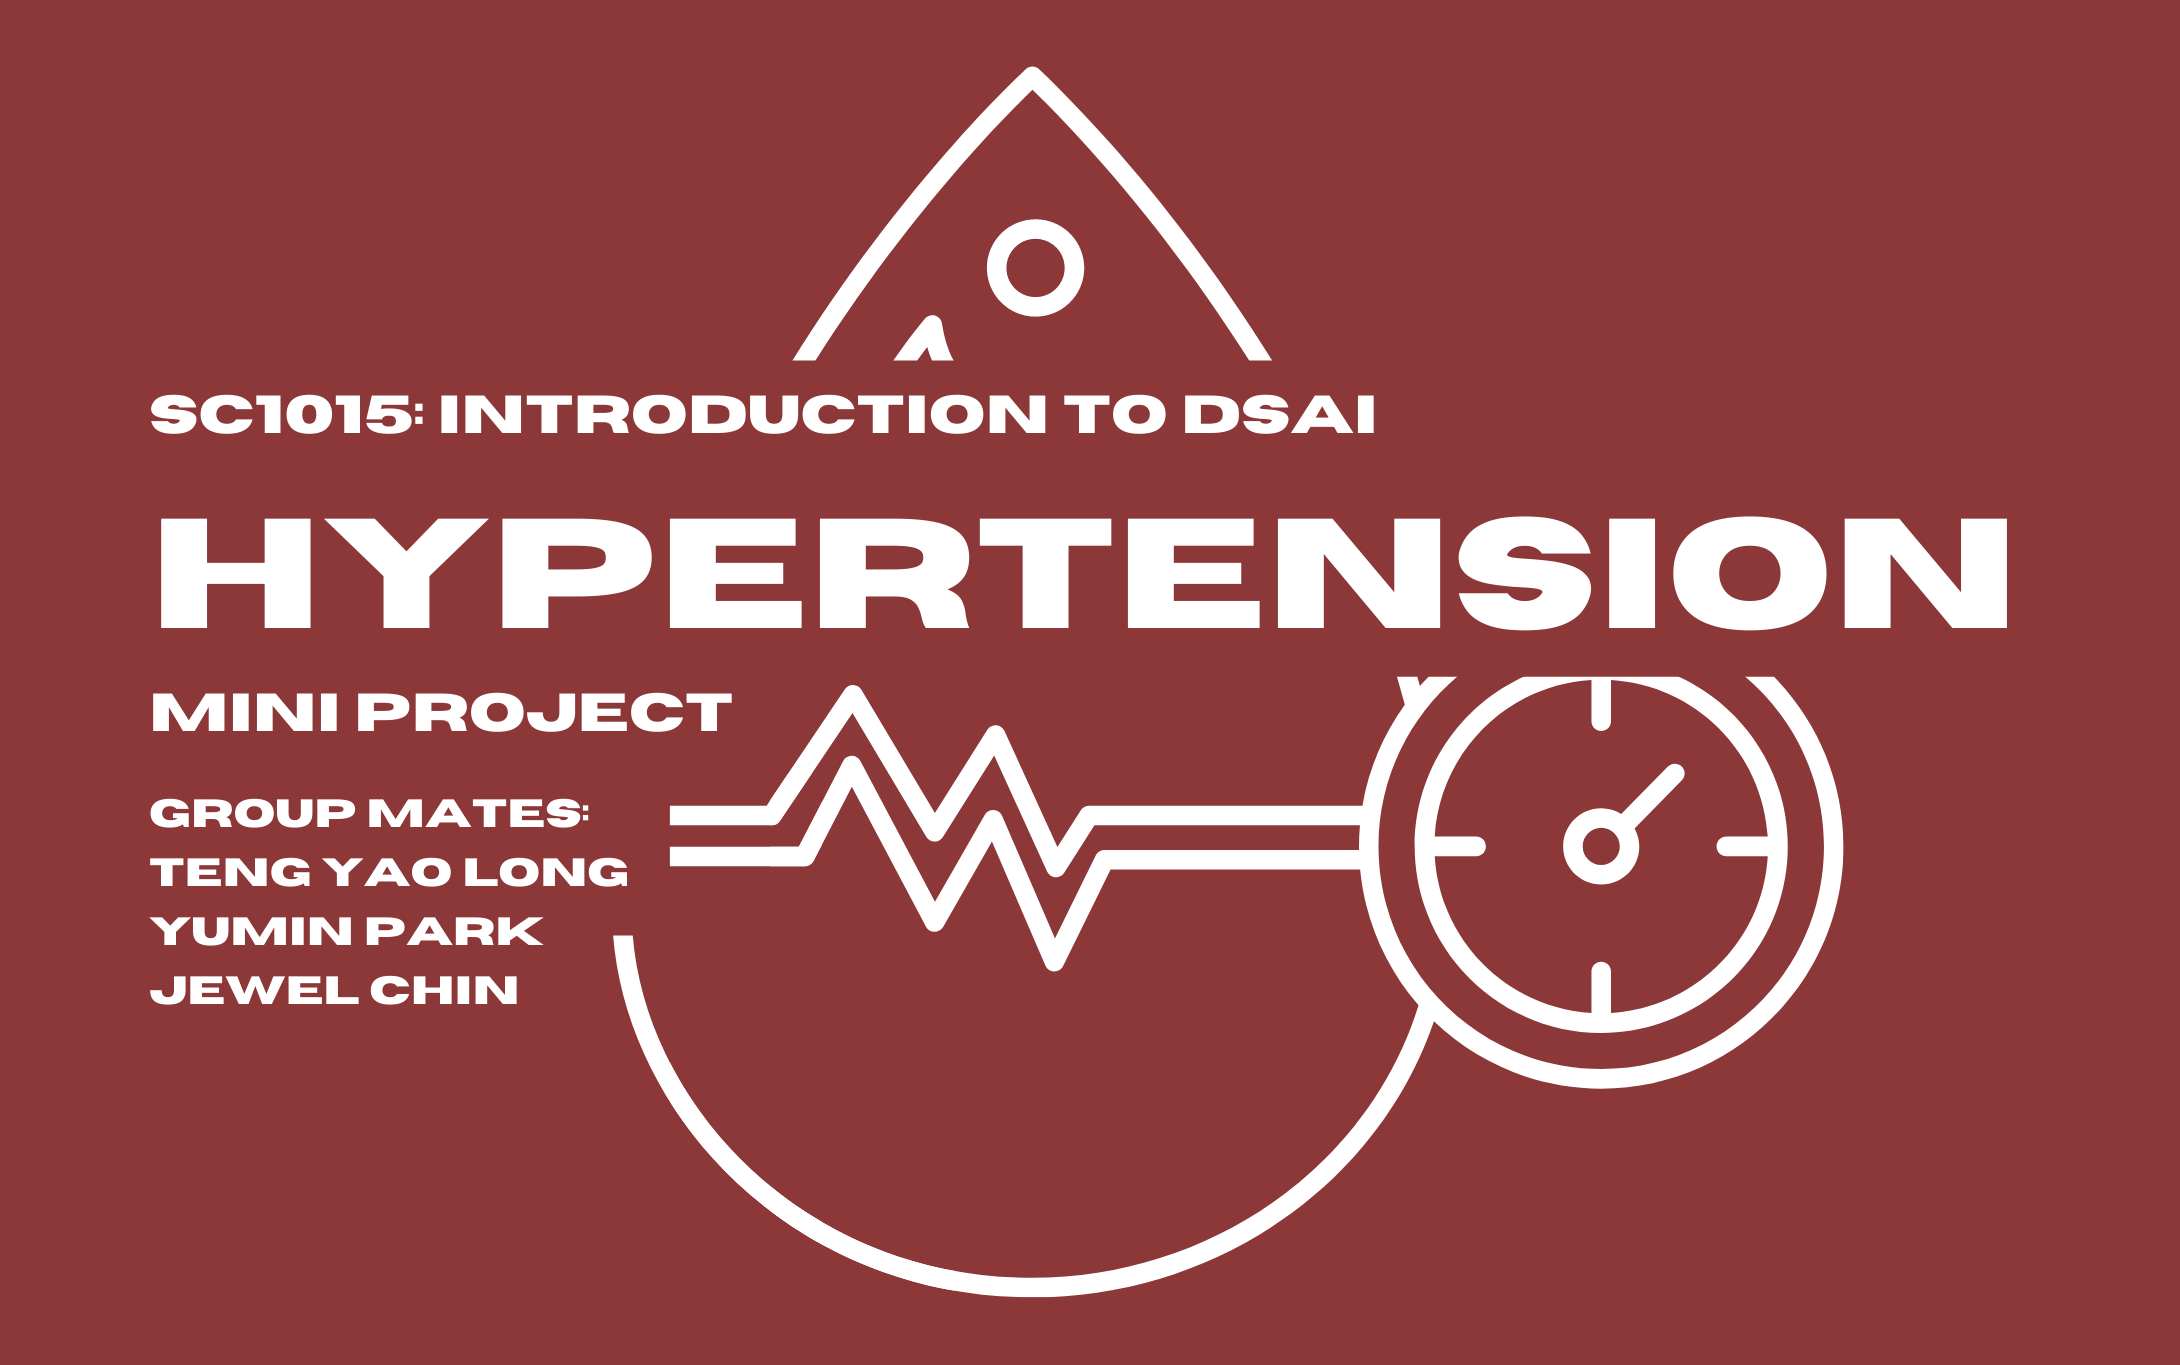

<div>
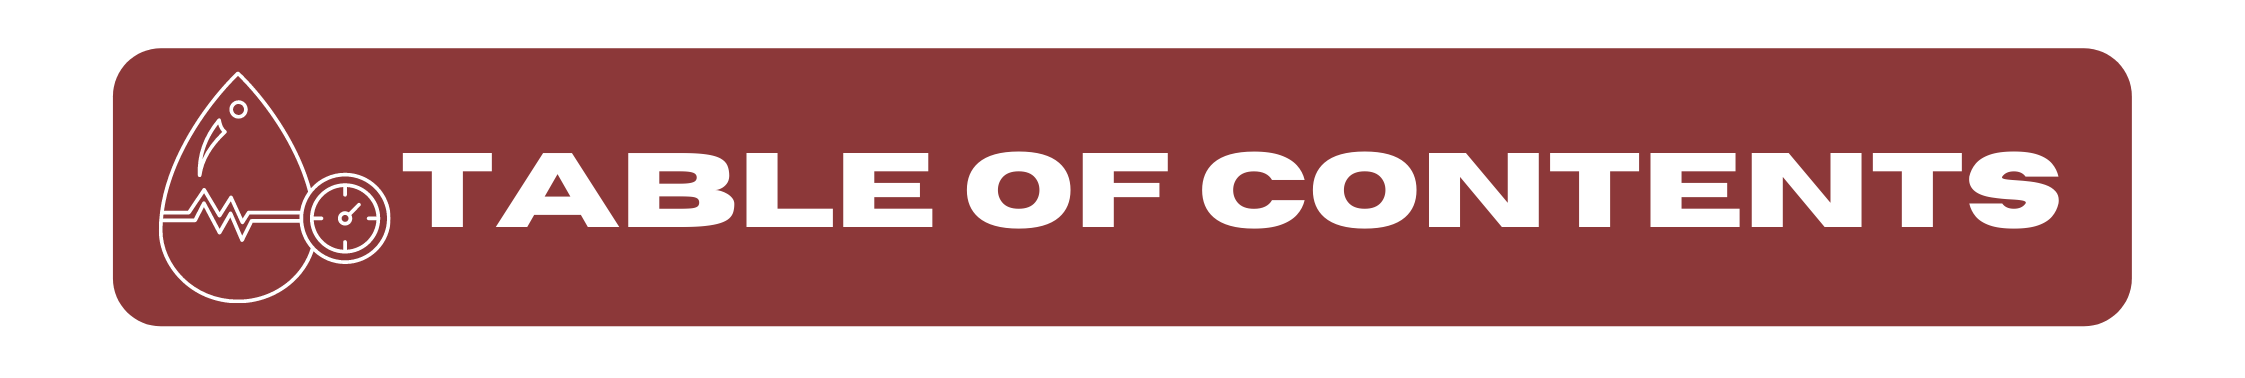
</div>

# 1. <a href='#4'>Introduction</a>
- 1.1 Libraries/Utilities <a href='#1.1'>Link</a>
- 1.2 Data Preprocessing <a href='#1.2'>Link</a>

# 2. <a href='#4'>Exploratory Data Analysis</a>

# 3. <a href='#4'>Data Balancing</a>

#  4. <a href='#4'>Modelling</a>
- 4.1 Logistic Regression <a href='#4.1'>Link</a>
- 4.2 Random Forest <a href='#4.2'>Link</a>
- 4.3 Support Vector Machine <a href='#4.3'>Link</a>
- 4.4 Artificial Neural Network <a href='#4.4'>Link</a>
- 4.5 eXtreme Gradient Boosting Classifier (XGBoost) <a href='#4.5'>Link</a>

# 5. <a href='#5'>Summary</a>

<a id='1'></a>
<div>
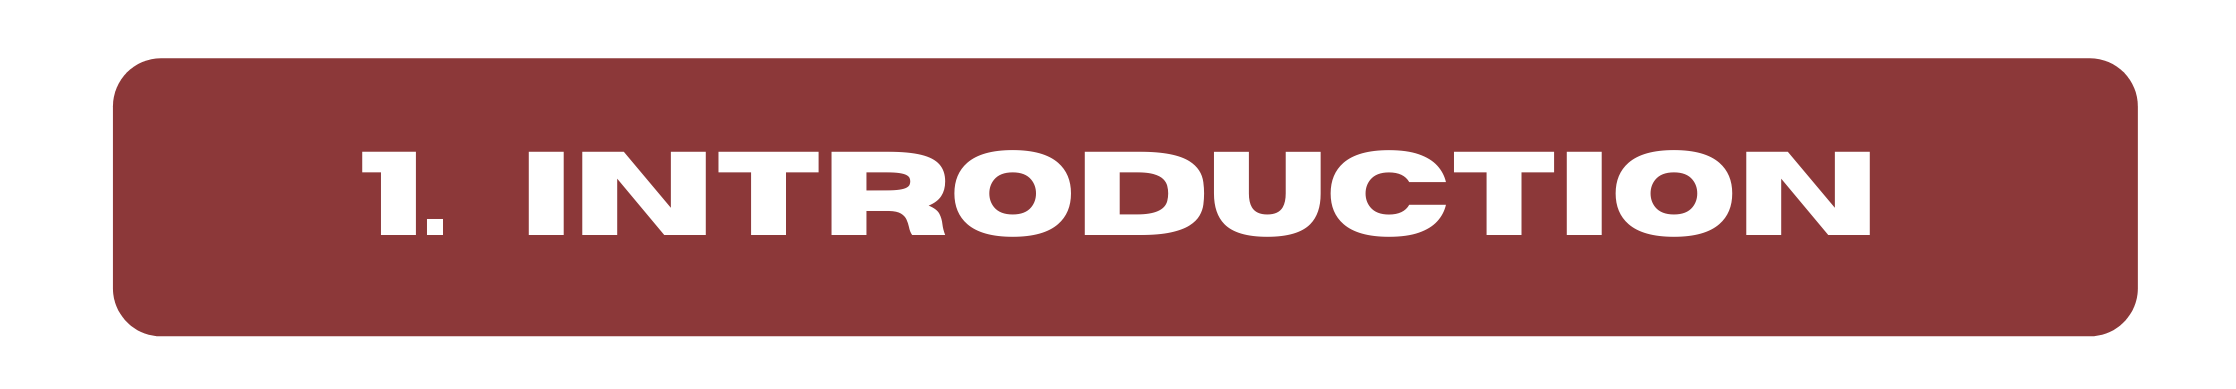
</div>

<a id='1.1'></a>
<div>
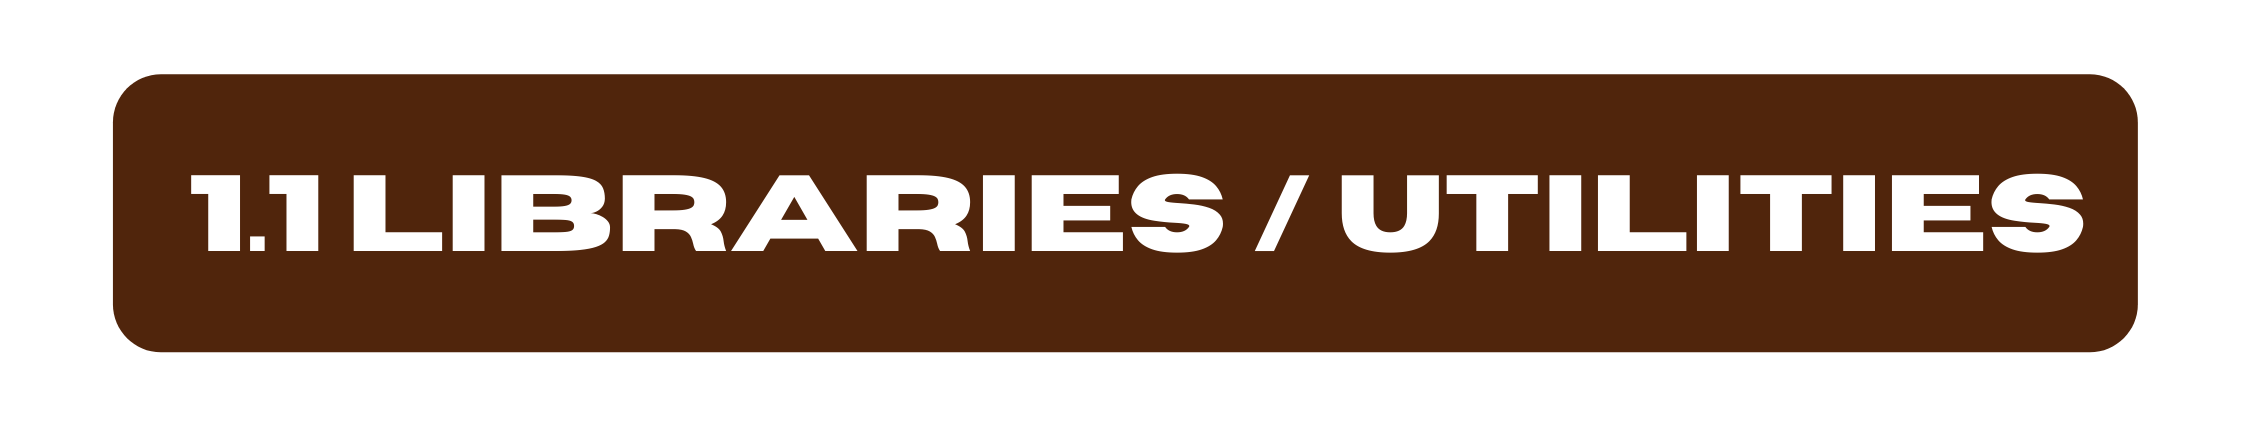
</div>

In [229]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings('ignore')

import plotly.offline as pyo
pyo.init_notebook_mode()

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report,confusion_matrix,f1_score



<a id='1.2'></a>
<div>
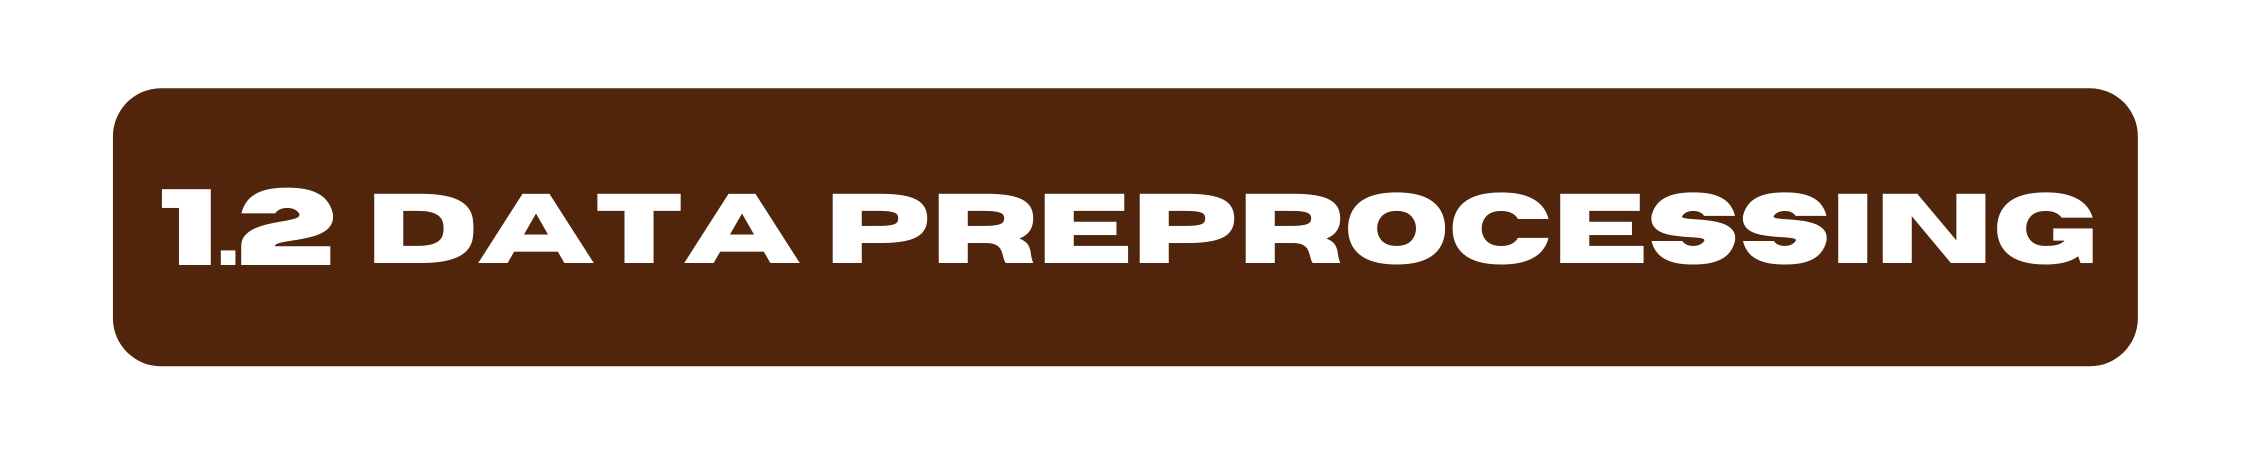
</div>

In [230]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head(10)

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   
5  56669    Male  81.0             0              0          Yes   
6  53882    Male  74.0             1              1          Yes   
7  10434  Female  69.0             0              0           No   
8  27419  Female  59.0             0              0          Yes   
9  60491  Female  78.0             0              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   
5        Private          Urban             186.21  29.0  formerly smoked   
6        Private          Rural              70.09  27.4     never smoked   
7        Private          Urban              94.39  22.8     never smoked   
8        Private          Rural              76.15   NaN          Unknown   
9        Private          Urban              58.57  24.2          Unknown   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
5       1  
6       1  
7       1  
8       1  
9       1

<font color='blood red'><font size="5">With a quick look at our data, smoking_status has more than 2 categories which may be possible to generalise into 2 categories (smoked and never smoked). </font> 

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


<font color='blood red'><font size="5">Numerical data: age, avg_glucose_level, bmi</font> 

<font color='blood red'><font size="5">Categorical data: gender, hypertension, heart_disease, ever_married, work_type, residence_type, smoking_status, stroke</font> 

In [232]:
# creating instance of labelencoder
le = LabelEncoder()
# Assigning numerical values and storing in another column
df['gender_Cat'] = le.fit_transform(df['gender'])
df['married_Cat'] = le.fit_transform(df['ever_married'])
df['worktype_Cat'] = le.fit_transform(df['work_type'])
df['Residence_type_Cat'] = le.fit_transform(df['Residence_type'])


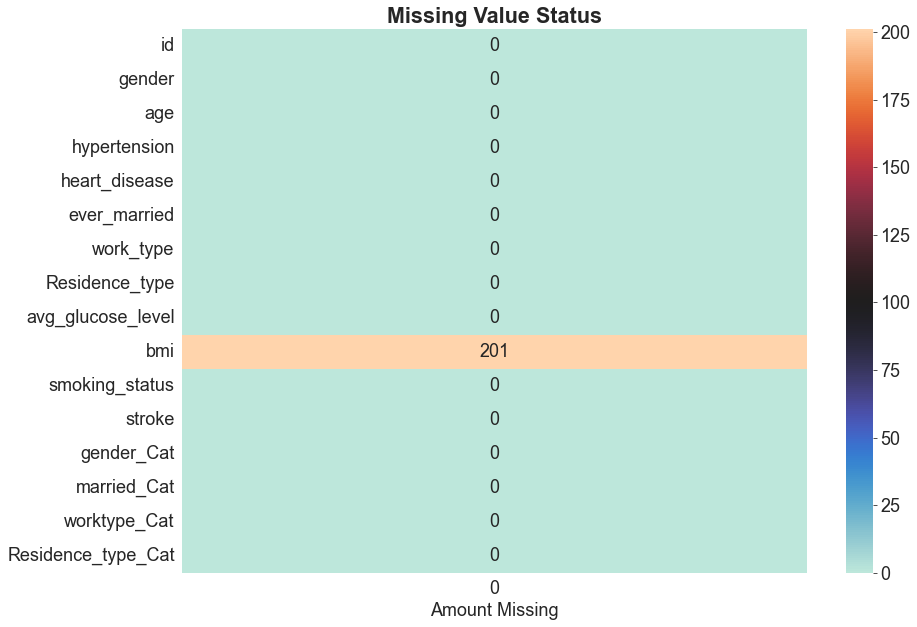

In [233]:
plt.title('Missing Value Status',fontweight='bold')
ax = sns.heatmap(df.isna().sum().to_frame(),annot=True,fmt='d',cmap='icefire')
ax.set_xlabel('Amount Missing')
plt.show()

<font color='blood red'><font size="5">As we can see, there are 201 missing data in bmi.</font> 

<a id='2'></a>
<div>
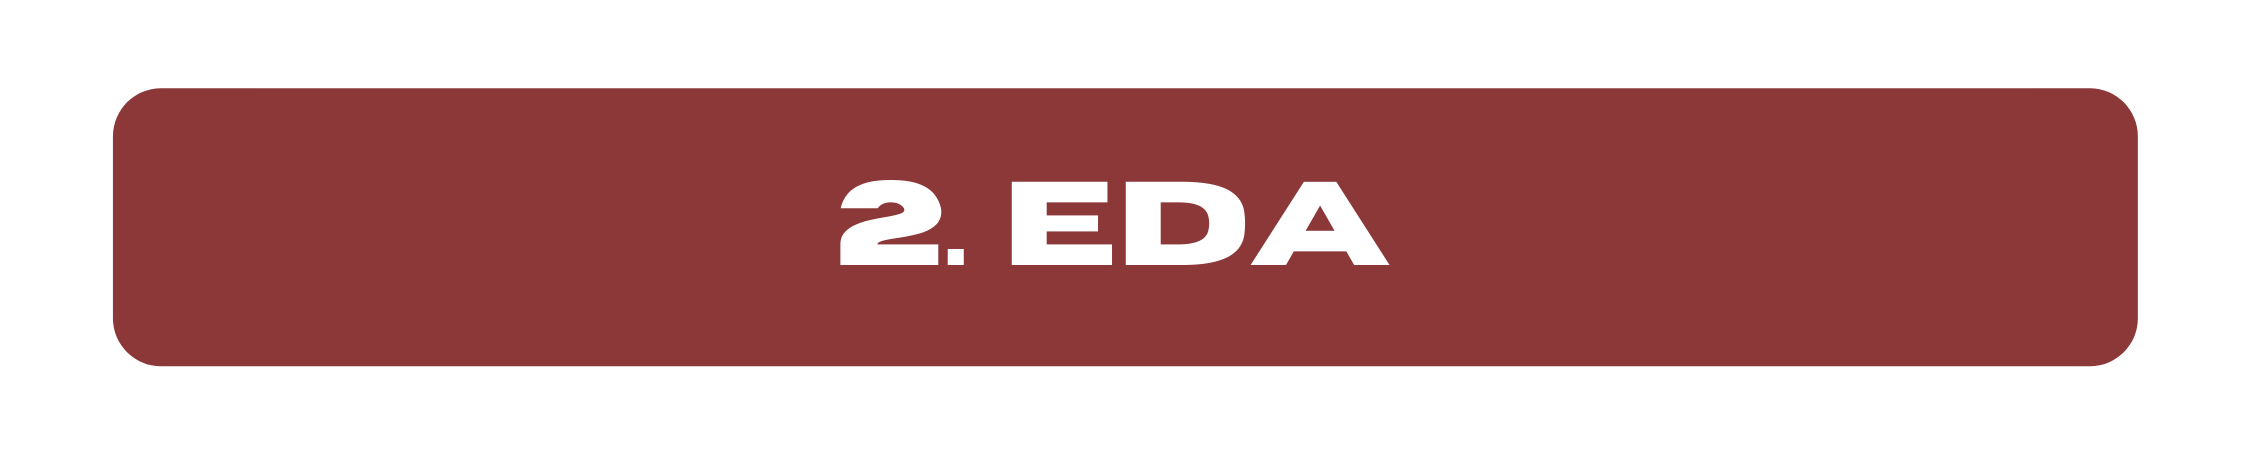
</div>

In [234]:
fig = ex.pie(df,names='hypertension')
fig.update_layout(title='<b>Proportion Of hyptertension Samples<b>')
fig.show()

<font color='blood red'><font size="5">As to be seen, the dataset is very imbalanced.</font><br />

<font color='blood red'><font size="5">We will need to deal with this imbalanced dataset later.</font>

# Feature: Smoking status

In [235]:
fig = ex.pie(df,names='smoking_status')
fig.update_layout(title='<b>Proportion Of Smoking Status Samples<b>')
fig.show()

In [236]:
len(df)

5110

<font color='blood red'><font size="5">Lets drop rows which has unknown smoking status</font>

In [237]:
df = df.drop(df[df['smoking_status']=='Unknown'].index)
len(df)

3566

In [238]:
fig = ex.pie(df,names='smoking_status')
fig.update_layout(title='<b>Proportion Of Smoking Status Samples<b>')
fig.show()

<font color='blood red'><font size="5">Let us combine formerly smoked and smokes to smokes</font>

In [239]:
df.loc[(df['smoking_status'] == 'formerly smoked'), 'smoking_status'] = 'smokes'

In [240]:
fig = ex.pie(df,names='smoking_status')
fig.update_layout(title='<b>Proportion Of Smoking Status Samples<b>')
fig.show()

In [241]:
#Encode smoke data
df['smoking_status_Cat'] = le.fit_transform(df['smoking_status'])

<font color='blood red'><font size="5">Let us see the correlation matrices</font> 

In [242]:
fig = make_subplots(rows=2, cols=1,shared_xaxes=True,subplot_titles=('Pearson Correlation', 
                                                                     'Spearman Correlation'))
s_val = df.corr('pearson')
s_idx = s_val.index
s_col = s_val.columns
s_val = s_val.values
fig.add_trace(
    go.Heatmap(x=s_col,y=s_idx,z=s_val,name='pearson',showscale=False,xgap=1,ygap=1),
    row=1, col=1
)


s_val = df.corr('spearman')
s_idx = s_val.index
s_col = s_val.columns
s_val = s_val.values
fig.add_trace(
    go.Heatmap(x=s_col,y=s_idx,z=s_val,xgap=1,ygap=1),
    row=2, col=1
)

fig.update_layout(height=700, width=900, title_text="Correlations")
fig.show()

<font color='blood red'><font size="5">As to be seen, the numerical data that correlates most to hypertension are age, avg_glucose_level and bmi. <br /><br />
Lets observe hypertension sample distribution based on Bmi and glucose level and
Hypertension Sample Distribution Based On Bmi And Age.

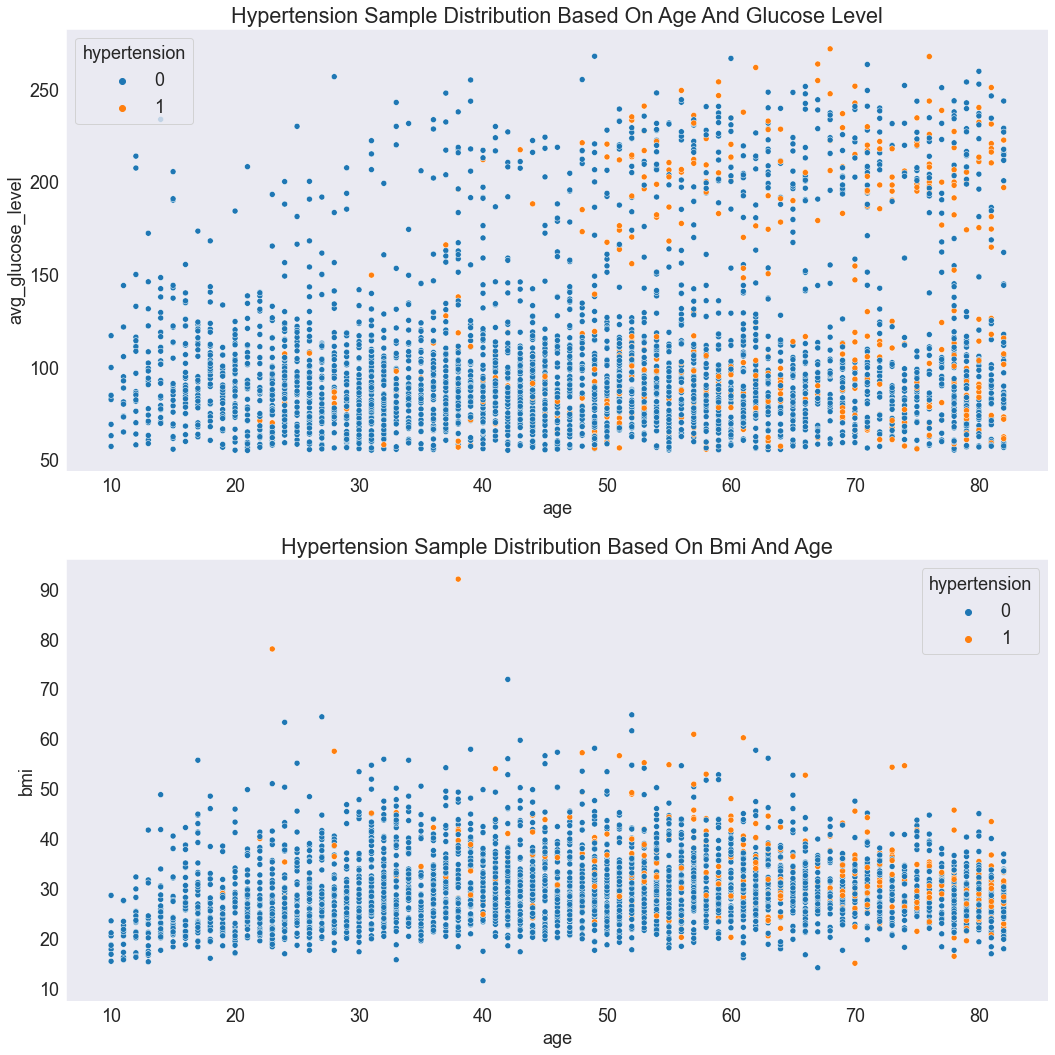

In [243]:
f, axs = plt.subplots(2,1,figsize=(15,15))

plt.subplot(2,1,1)
plt.title('Hypertension Sample Distribution Based On Age And Glucose Level')
sns.scatterplot(x=df['age'],y=df['avg_glucose_level'],hue=df['hypertension'])
plt.subplot(2,1,2)
plt.title('Hypertension Sample Distribution Based On Bmi And Age')
sns.scatterplot(x=df['age'],y=df['bmi'],hue=df['hypertension'])
plt.tight_layout()
plt.show()

<font color='blood red'><font size="5">Age is a very important factor in predicting hypertension

<font color='blood red'><font size="5">Remember we had some missing values for bmi? Let us use predict it with a simple regression model with age, gender,  hypertension and avg_glucose_level to fill in the missing value instead of naively inputting it with the mean or median.

In [244]:
bmi_pipe = Pipeline( steps=[
                            ('scaler',StandardScaler()),
                            ('LinReg',LinearRegression())
                              ])
X = df[['age','avg_glucose_level','hypertension','bmi']].copy()


In [177]:

Missing = X[X.bmi.isna()]
X = X[~X.bmi.isna()]
Y = X.pop('bmi')
bmi_pipe.fit(X,Y)
predicted_bmi = pd.Series(bmi_pipe.predict(Missing[['age','avg_glucose_level','hypertension']]),index=Missing.index)
df.loc[Missing.index,'bmi'] = predicted_bmi

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3566 entries, 0 to 5108
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  3566 non-null   int64  
 1   gender              3566 non-null   object 
 2   age                 3566 non-null   float64
 3   hypertension        3566 non-null   int64  
 4   heart_disease       3566 non-null   int64  
 5   ever_married        3566 non-null   object 
 6   work_type           3566 non-null   object 
 7   Residence_type      3566 non-null   object 
 8   avg_glucose_level   3566 non-null   float64
 9   bmi                 3566 non-null   float64
 10  smoking_status      3566 non-null   object 
 11  stroke              3566 non-null   int64  
 12  gender_Cat          3566 non-null   int64  
 13  married_Cat         3566 non-null   int64  
 14  worktype_Cat        3566 non-null   int64  
 15  Residence_type_Cat  3566 non-null   int64  
 16  smokin

In [179]:
df['bmi'].describe()

count    3566.000000
mean       30.319306
std         7.160341
min        11.500000
25%        25.400000
50%        29.382768
75%        33.900000
max        92.000000
Name: bmi, dtype: float64

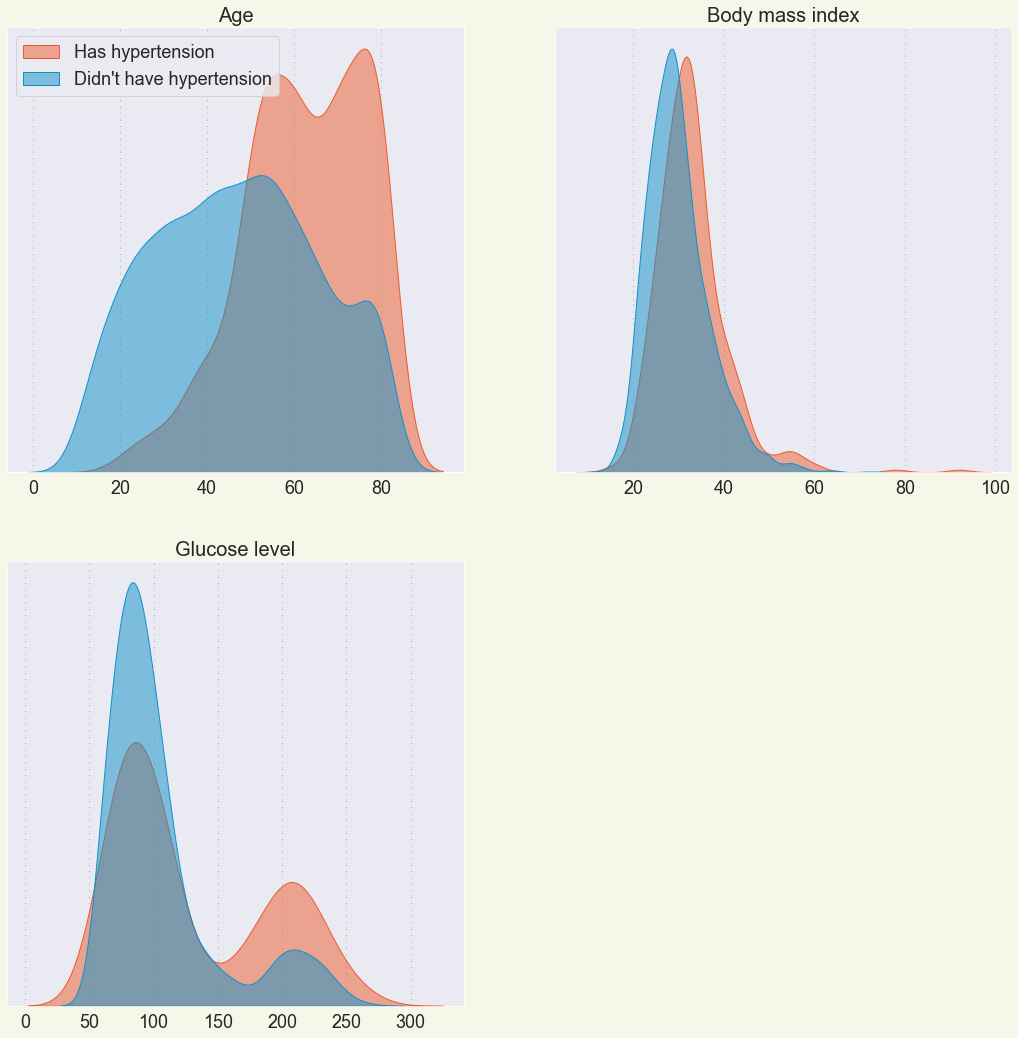

In [180]:
fig = plt.figure(figsize = (18, 18))
fig.patch.set_facecolor('#f6f6e9')

plt.subplot(221)
sns.set_style("dark")
plt.title('Age', size = 20)
sns.kdeplot(df.query('hypertension == 1')['age'], color = '#ed5b2d', shade = True, label = 'Has hypertension', alpha = 0.5)
sns.kdeplot(df.query('hypertension == 0')['age'], color = '#1092c9', shade = True, label = "Didn't have hypertension", alpha = 0.5)
plt.grid(color = 'gray', linestyle = ':', axis = 'x', zorder = 0,  dashes = (1,7))
plt.ylabel('')
plt.xlabel('')
plt.yticks([])
plt.legend(loc = 'upper left')

plt.subplot(222)
plt.title('Body mass index', size = 20)
sns.kdeplot(df.query('hypertension == 1')['bmi'], color = '#ed5b2d', shade = True, label = 'Has hypertension', alpha = 0.5)
sns.kdeplot(df.query('hypertension == 0')['bmi'], color = '#1092c9', shade = True, label = "Didn't have hypertension", alpha = 0.5)
plt.grid(color = 'gray', linestyle = ':', axis = 'x', zorder = 0,  dashes = (1,7))
plt.ylabel('')
plt.xlabel('')
plt.yticks([])
plt.legend('').set_visible(False)

plt.subplot(223)
plt.title('Glucose level', size = 20)
sns.kdeplot(df.query('hypertension == 1')['avg_glucose_level'], color = '#ed5b2d', shade = True, label = 'Has hypertenson', alpha = 0.5)
sns.kdeplot(df.query('hypertension == 0')['avg_glucose_level'], color = '#1092c9', shade = True, label = "Didn't have hypertension", alpha = 0.5)
plt.grid(color = 'gray', linestyle = ':', axis = 'x', zorder = 0,  dashes = (1,7))
plt.ylabel('')
plt.xlabel('')
plt.yticks([])
plt.legend('').set_visible(False)

plt.show()

<font color='blood red'><font size="5">
KDE plot insights


- above the age of 40, one is very likely to have hypertension especially above 50s.
  possible relationship between age and hypertension.

- BMI cannot tell anything (explore more later)

- glucose level < 140 is where one is very likely to not have hypertension. note: this is the range for a normal, healthy person.

- glucose level > 150 is where one is more likely to have hypertension.
  At around glucose level > 200 is where one is more likely to have hypertension.  
  Note: this is the range where one is considered diabetic. 

- possible relationship between glucose levels and hypertension.



In [181]:
stroke = df.copy()
# Create age groups
stroke['age_group'] = 0
for i in range(len(stroke.index)):
    if stroke.iloc[i, 2] < 2:
        stroke.iloc[i, 17] = 'baby'
    elif stroke.iloc[i, 2] < 17 and stroke.iloc[i, 2] >= 2:
        stroke.iloc[i, 17] = 'child'
    elif stroke.iloc[i, 2] < 30 and stroke.iloc[i, 2] >= 17:
        stroke.iloc[i, 17] = 'young adults'
    elif stroke.iloc[i, 2] < 60 and stroke.iloc[i, 2] >= 30:
        stroke.iloc[i, 17] = 'middle-aged adults'
    elif stroke.iloc[i, 2] < 80 and stroke.iloc[i, 2] >= 60:
        stroke.iloc[i, 17] = 'old-aged adults'
    else:
        stroke.iloc[i, 17] = 'long-lived'
        
# Create bmi groups
stroke['bmi_group'] = 0
for i in range(len(stroke.index)):
    if stroke.iloc[i, 9] < 18.5:
        stroke.iloc[i, 13] = 'Underweight'
    elif stroke.iloc[i, 9] < 25.0 and stroke.iloc[i, 9] >= 18.5:
        stroke.iloc[i, 18] = 'Normal weight'
    elif stroke.iloc[i, 9] < 30.0 and stroke.iloc[i, 9] >= 25.0:
        stroke.iloc[i, 18] = 'Overweight'
    else:
        stroke.iloc[i, 18] = 'Obese'
        
# Create glucose groups
stroke['glucose_group'] = 0
for i in range(len(stroke.index)):
    if stroke.iloc[i, 8] < 100:
        stroke.iloc[i, 19] = 'Normal'
    elif stroke.iloc[i, 8] >= 100 and stroke.iloc[i, 8] < 125:
        stroke.iloc[i, 19] = 'Prediabetes'
    else:
        stroke.iloc[i, 19] = 'Diabetes'

In [182]:
# Grouping by categorical features
dst_st_age = stroke.groupby(['age_group', 'hypertension']).agg({'hypertension': 'count'}).rename(columns = {'hypertension': 'count'}).reset_index()
stroke1 = stroke.groupby(['stroke', 'hypertension']).agg({'hypertension': 'count'}).rename(columns = {'hypertension': 'count'}).reset_index()
heart = stroke.groupby(['heart_disease', 'hypertension']).agg({'hypertension': 'count'}).rename(columns = {'hypertension': 'count'}).reset_index()
marry = stroke.groupby(['ever_married', 'hypertension']).agg({'hypertension': 'count'}).rename(columns = {'hypertension': 'count'}).reset_index()
work = stroke.groupby(['work_type', 'hypertension']).agg({'hypertension': 'count'}).rename(columns = {'hypertension': 'count'}).reset_index()
residence = stroke.groupby(['Residence_type', 'hypertension']).agg({'hypertension': 'count'}).rename(columns = {'hypertension': 'count'}).reset_index()
glucose_group = stroke.groupby(['glucose_group', 'hypertension']).agg({'hypertension': 'count'}).rename(columns = {'hypertension': 'count'}).reset_index()
bmi_group = stroke.groupby(['bmi_group', 'hypertension']).agg({'hypertension': 'count'}).rename(columns = {'hypertension': 'count'}).reset_index()
smoking = stroke.query('smoking_status != "Unknown"').groupby(['smoking_status', 'hypertension']).agg({'hypertension': 'count'})\
.rename(columns = {'hypertension': 'count'}).reset_index()

# Create percent column for data frames
def percent(data):
    data['percent'] = 0
    for i in range(len(data.index)):
        if i < len(data.index)-1:
            if data.iloc[i, 0] == data.iloc[i+1, 0]:
                data.iloc[i, 3] = round((data.iloc[i, 2] / (data.iloc[i, 2] + data.iloc[i+1, 2])) * 100, 1)
            elif data.iloc[i, 0] == data.iloc[i-1, 0]:
                data.iloc[i, 3] = 100 - data.iloc[i-1, 3]
            else:
                data.iloc[i, 3] = 100.0
        else:
            if data.iloc[i, 0] == data.iloc[i-1, 0]:
                data.iloc[i, 3] = 100 - data.iloc[i-1, 3]
            else:
                data.iloc[i, 3] = 100.0
            
percent(dst_st_age)
percent(stroke1)
percent(heart)
percent(marry)
percent(work)
percent(residence)
percent(glucose_group)
percent(bmi_group)
percent(smoking)


In [183]:
stroke.head(20)

id  gender   age  hypertension  heart_disease ever_married  \
0    9046    Male  67.0             0              1          Yes   
1   51676  Female  61.0             0              0          Yes   
2   31112    Male  80.0             0              1          Yes   
3   60182  Female  49.0             0              0          Yes   
4    1665  Female  79.0             1              0          Yes   
5   56669    Male  81.0             0              0          Yes   
6   53882    Male  74.0             1              1          Yes   
7   10434  Female  69.0             0              0           No   
10  12109  Female  81.0             1              0          Yes   
11  12095  Female  61.0             0              1          Yes   
12  12175  Female  54.0             0              0          Yes   
14   5317  Female  79.0             0              1          Yes   
15  58202  Female  50.0             1              0          Yes   
16  56112    Male  64.0             0              1          Yes   
17  34120    Male  75.0             1              0          Yes   
18  27458  Female  60.0             0              0           No   
20  70630  Female  71.0             0              0          Yes   
21  13861  Female  52.0             1              0          Yes   
22  68794  Female  79.0             0              0          Yes   
24   4219    Male  71.0             0              0          Yes   

        work_type Residence_type  avg_glucose_level        bmi smoking_status  \
0         Private          Urban             228.69  36.600000         smokes   
1   Self-employed          Rural             202.21  32.031278   never smoked   
2         Private          Rural             105.92  32.500000   never smoked   
3         Private          Urban             171.23  34.400000         smokes   
4   Self-employed          Rural             174.12  24.000000   never smoked   
5         Private          Urban             186.21  29.000000         smokes   
6         Private          Rural              70.09  27.400000   never smoked   
7         Private          Urban              94.39  22.800000   never smoked   
10        Private          Rural              80.43  29.700000   never smoked   
11       Govt_job          Rural             120.46  36.800000         smokes   
12        Private          Urban             104.51  27.300000         smokes   
14        Private          Urban             214.09  28.200000   never smoked   
15  Self-employed          Rural             167.41  30.900000   never smoked   
16        Private          Urban             191.61  37.500000         smokes   
17        Private          Urban             221.29  25.800000         smokes   
18        Private          Urban              89.22  37.800000   never smoked   
20       Govt_job          Rural             193.94  22.400000         smokes   
21  Self-employed          Urban             233.29  48.900000   never smoked   
22  Self-employed          Urban             228.70  26.600000   never smoked   
24        Private          Urban             102.87  27.200000         smokes   

    stroke  gender_Cat married_Cat  worktype_Cat  Residence_type_Cat  \
0        1           1           1             2                   1   
1        1           0           1             3                   0   
2        1           1           1             2                   0   
3        1           0           1             2                   1   
4        1           0           1             3                   0   
5        1           1           1             2                   1   
6        1           1           1             2                   0   
7        1           0           0             2                   1   
10       1           0           1             2                   0   
11       1           0           1             0                   0   
12       1           0           1             2               

In [184]:
dst_st_age

age_group  hypertension  count  percent
0               child             0    139    100.0
1          long-lived             0    106     70.2
2          long-lived             1     45     29.8
3  middle-aged adults             0   1608     90.2
4  middle-aged adults             1    175      9.8
5     old-aged adults             0    749     77.6
6     old-aged adults             1    216     22.4
7        young adults             0    518     98.1
8        young adults             1     10      1.9

In [185]:
dst_st_age.iloc[[2,4,6,8], 1] = "Had hypertension"
dst_st_age.iloc[[0,1,3,5,7], 1] = "Didn't have hypertension"

stroke1.iloc[[0,1], 0] = 'No stroke'
stroke1.iloc[[2,3], 0] = 'Stroke'

heart.iloc[[0,1], 0] = 'No heart diseases'
heart.iloc[[2,3], 0] = 'Heart diseases'

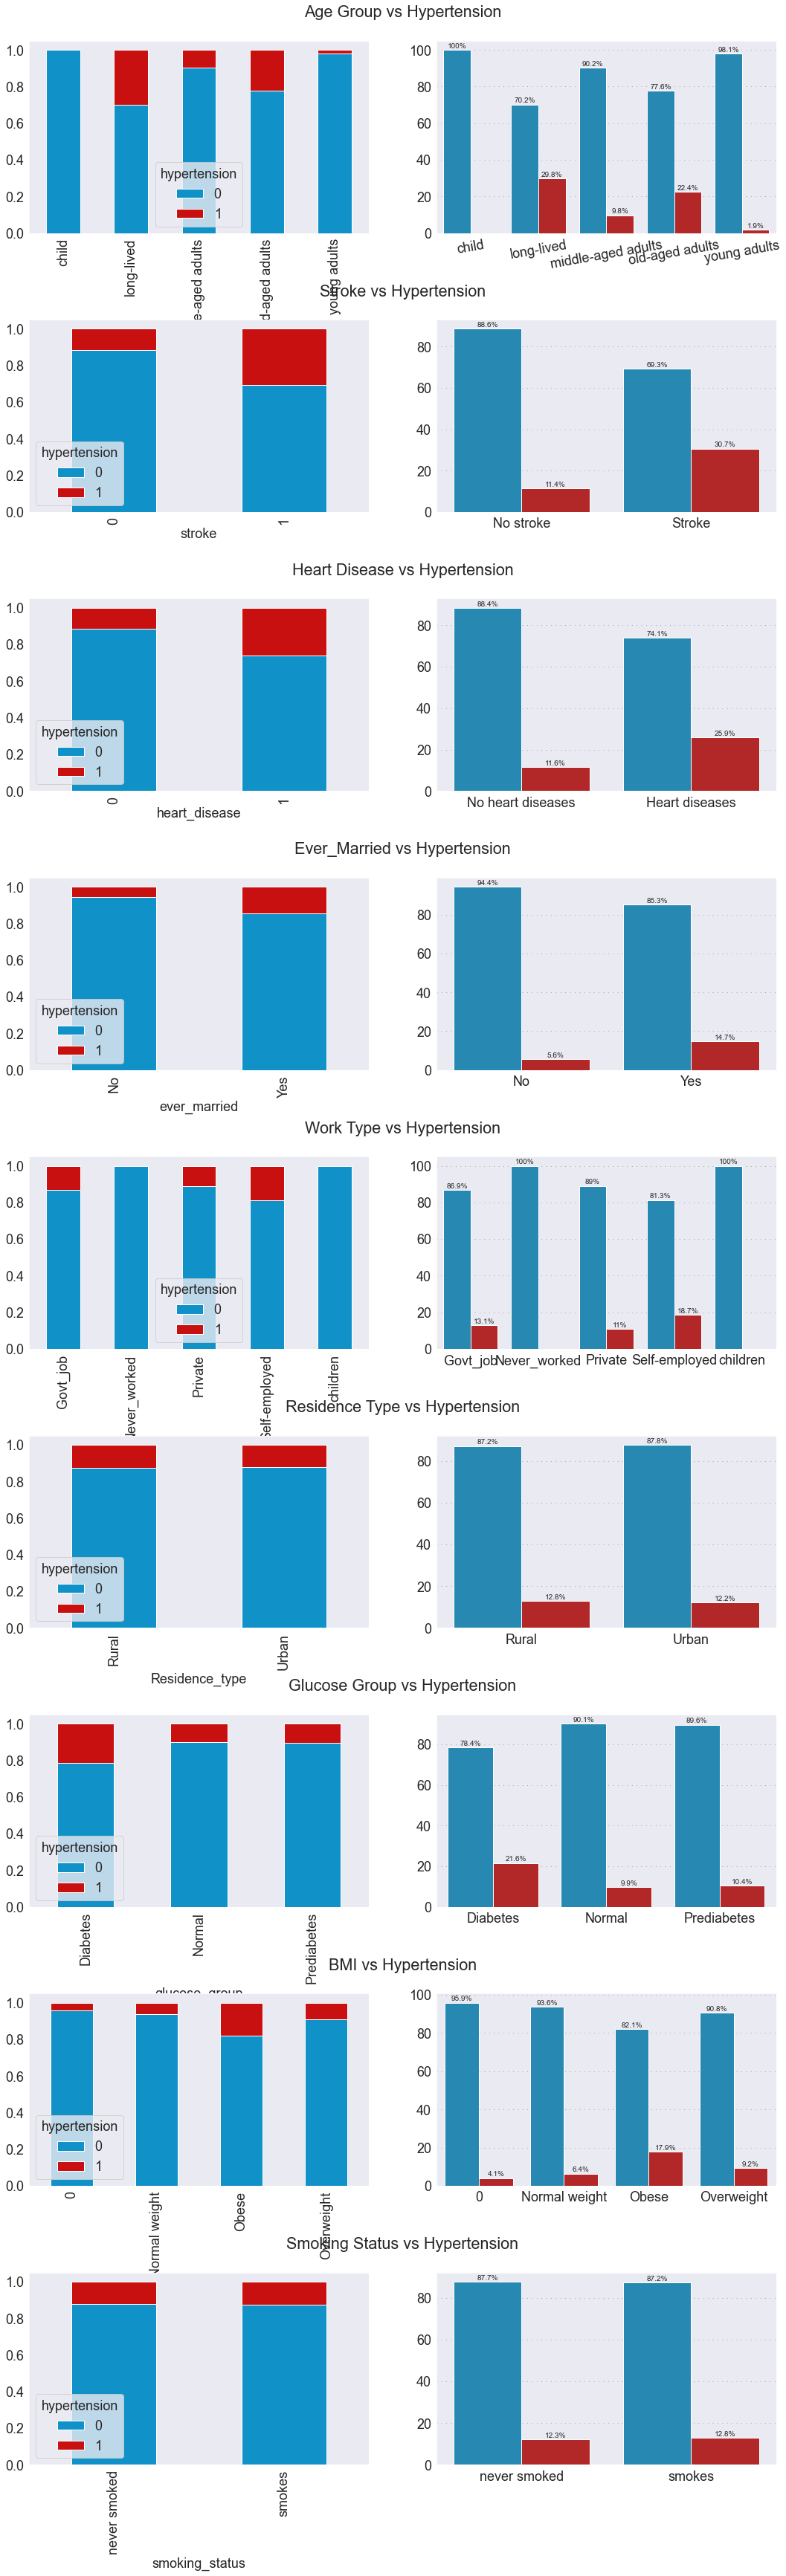

In [187]:
plt.rcParams.update({'font.size': 18})
ax.tick_params(labelrotation=45)
fig.tight_layout()
fig.patch.set_facecolor('#fafafa')
f, axes = plt.subplots(9, 2, figsize=(18,60))
f.subplots_adjust(hspace=.45)

table=pd.crosstab(stroke.age_group,stroke.hypertension)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,ax = axes[0,0],  color = ['#1092c9','#c91010'])
axes[0,0].set_title('Age Group vs Hypertension', y=1.1 , x=1.1)
plt.subplot(922)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
a2 = sns.barplot(data = dst_st_age, x = dst_st_age['age_group'], y = dst_st_age['percent'], hue = dst_st_age['hypertension'], palette = ['#1092c9','#c91010',])
plt.xticks(rotation = 10)
plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)

##########

table=pd.crosstab(stroke.stroke,stroke.hypertension)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,ax = axes[1,0],  color = ['#1092c9','#c91010',])
axes[1,0].set_title('Stroke vs Hypertension', y=1.1 , x=1.1)
plt.subplot(924)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
b2 = sns.barplot(data = stroke1, x = stroke1['stroke'], y = stroke1['percent'], hue = stroke1['hypertension'], palette = ['#1092c9','#c91010',])
plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)

##########

table=pd.crosstab(stroke.heart_disease,stroke.hypertension)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,ax = axes[2,0], color = ['#1092c9','#c91010',])
axes[2,0].set_title('Heart Disease vs Hypertension', y=1.1 , x=1.1)
plt.subplot(926)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
c2 = sns.barplot(data = heart, x = heart['heart_disease'], y = heart['percent'], hue = heart['hypertension'], palette = ['#1092c9','#c91010',])
plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)

##########
table=pd.crosstab(stroke.ever_married,stroke.hypertension)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,ax = axes[3,0], color = ['#1092c9','#c91010',])
axes[3,0].set_title('Ever_Married vs Hypertension', y=1.1 , x=1.1)
plt.subplot(928)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
d2 = sns.barplot(data = marry, x = marry['ever_married'], y = marry['percent'], hue = marry['hypertension'], palette = ['#1092c9','#c91010'])
plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)
##########
table=pd.crosstab(stroke.work_type,stroke.hypertension)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,ax = axes[4,0], color = ['#1092c9','#c91010',])
axes[4,0].set_title('Work Type vs Hypertension', y=1.1 , x=1.1)
plt.subplot(9,2,10)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
e2 = sns.barplot(data = work, x = work['work_type'], y = work['percent'], hue = work['hypertension'], palette = ['#1092c9','#c91010'])
plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)
##########
table=pd.crosstab(stroke.Residence_type,stroke.hypertension)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,ax = axes[5,0], color = ['#1092c9','#c91010',])
axes[5,0].set_title('Residence Type vs Hypertension', y=1.1 , x=1.1)
plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)

plt.subplot(9,2,12)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
f2 = sns.barplot(data = residence, x = residence['Residence_type'], y = residence['percent'], hue = residence['hypertension'], palette = ['#1092c9','#c91010'])
plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)
##########

table=pd.crosstab(stroke.glucose_group,stroke.hypertension)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,ax = axes[6,0], color = ['#1092c9','#c91010'])
axes[6,0].set_title('Glucose Group vs Hypertension', y=1.1 , x=1.1)
plt.subplot(9,2,14)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
g2 = sns.barplot(data = glucose_group, x = glucose_group['glucose_group'], y = glucose_group['percent'], hue = glucose_group['hypertension'], palette = ['#1092c9','#c91010'])
plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)
##########
table=pd.crosstab(stroke.bmi_group,stroke.hypertension)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,ax = axes[7,0],color = ['#1092c9','#c91010'])
axes[7,0].set_title('BMI vs Hypertension', y=1.1 , x=1.1)
plt.subplot(9,2,16)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
h2 = sns.barplot(data = bmi_group, x = bmi_group['bmi_group'], y = bmi_group['percent'], hue = bmi_group['hypertension'], palette = ['#1092c9','#c91010'])
plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)
##########
table=pd.crosstab(stroke.smoking_status, stroke.hypertension)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,ax = axes[8,0],color = ['#1092c9','#c91010'])
axes[8,0].set_title('Smoking Status vs Hypertension', y=1.1 , x=1.1)
plt.subplot(9,2,18)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
j2 = sns.barplot(data = smoking, x = smoking['smoking_status'], y = smoking['percent'], hue = smoking['hypertension'], palette = ['#1092c9','#c91010'])
plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)
##########
# add annotations
for i in [a,b,c,d,e,f,g,h,j]:
    for p in i.patches:
        height = p.get_height()
        i.annotate(f'{height:g}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   size = 10,
                   xytext = (0, 5), 
                   textcoords = 'offset points')

for i in [a2,b2,c2,d2,e2,f2,g2,h2,j2]:
    for p in i.patches:
        height = p.get_height()
        i.annotate(f'{height:g}%', (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   size = 10,
                   xytext = (0, 5), 
                   textcoords = 'offset points')
        
plt.show()

<font color='blood red'><font size="5">based on barplots <br /><br />

1) Age Group

 - long-lived and middle-aged adults are more likely to have hypertension.
 - strong correlation between age group and hypertension.

2) Stroke and Heart Diseases
- strong correlation between stroke and hypertension.
- strong correlation between heart diseases and hypertension.
- However, this can still happen to those who did not have stroke or heart diseases given available data.

3) Ever Married
- weak correlation between marriage status and hypertension.
- if ever married, there is higher risk of hypertension.

4) Work Type
- percentages for govt job, private and self-employed are very similar.
- note that the data is very imbalanced. (alot of private, everything else very little)
- hard to check relationship as there are only 14 who never worked, which is a stark difference in data amount compared to the rest.

5) Residence Type
- residence type do not seem to affect since the percentages are quite similar.
- not much correlation.

6) Glucose Group
- those with diabetes are more likely to have hypertension.
- strong correlation between glucose levels and hypertension.

7) BMI
- those who are obese are more likely to have hypertension.
- strong correlation between bmi and hypertension.

8) Smoking
- smoking do not seem to affect since the percentages are quite similar.
- not much correlation.

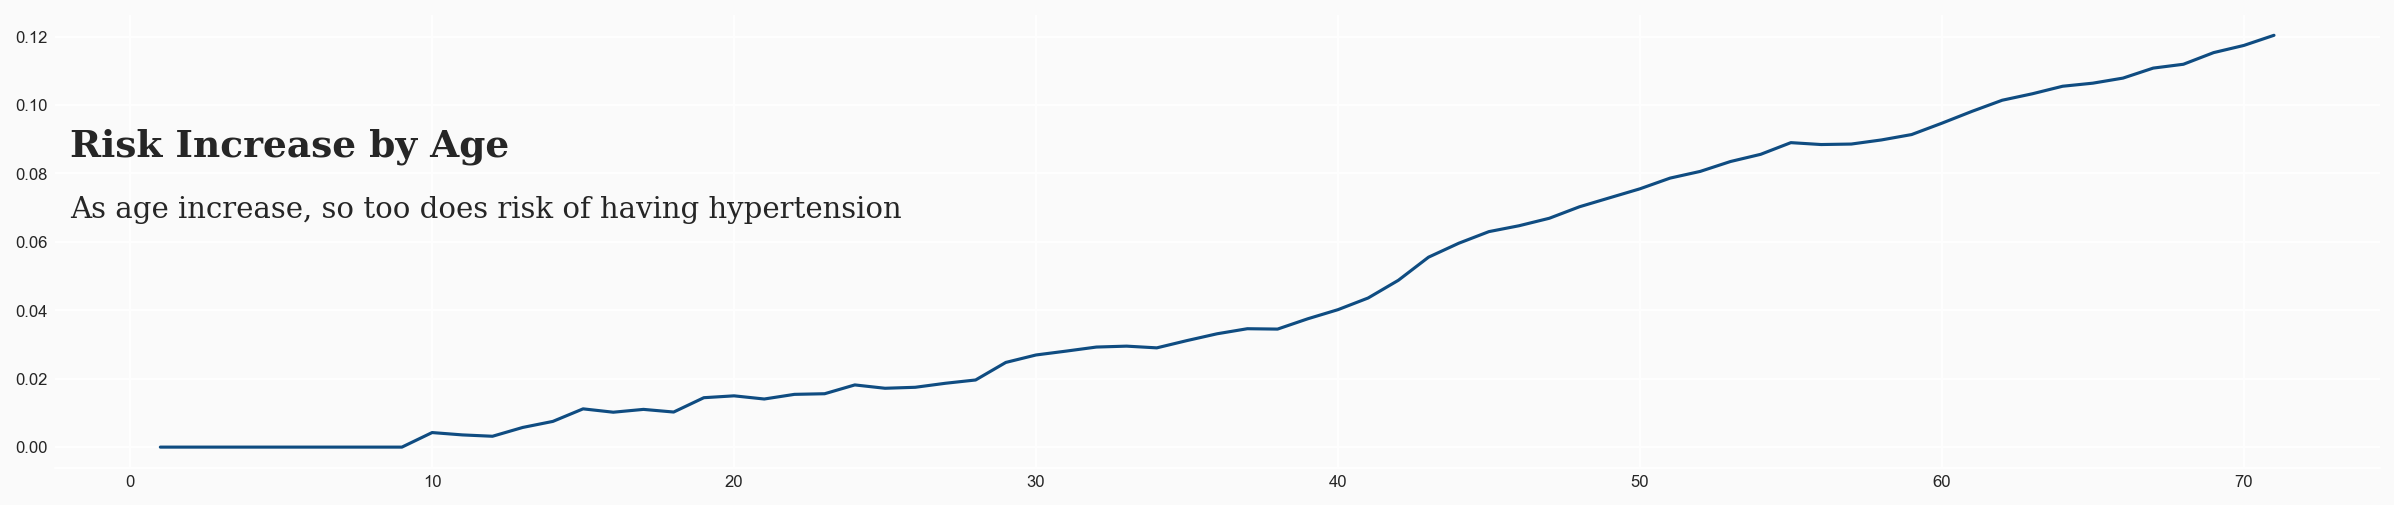

In [141]:
background_color = "#fafafa"
fig = plt.figure(figsize=(20, 10), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(2, 1)
gs.update(wspace=0.11, hspace=0.5)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)


df['age'] = df['age'].astype(int)

rate = []
for i in range(df['age'].min(), df['age'].max()):
    rate.append(df[df['age'] < i]['hypertension'].sum() / len(df[df['age'] < i]['hypertension']))

sns.lineplot(data=rate,color='#0f4c81',ax=ax0)

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)

ax0.tick_params(axis='both', which='major', labelsize=8)
ax0.tick_params(axis=u'both', which=u'both',length=0)

ax0.text(-2,0.085,'Risk Increase by Age',fontsize=18,fontfamily='serif',fontweight='bold')
ax0.text(-2,0.067,'As age increase, so too does risk of having hypertension',fontsize=14,fontfamily='serif')


plt.show()

<font color='blood red'><font size="5">Distribution plot of BMI<br /><br />

In [143]:
bmi = list(df['bmi'].values)
hist_data = [bmi]
group_labels = ["bmi"]
colors = ['#1f77b4']
fig = ff.create_distplot(hist_data,group_labels,show_hist = True,colors=colors)
fig.update_layout({"template":"plotly_dark"})
fig.show()

In [142]:
df["gender"].value_counts()

Female    2158
Male      1407
Other        1
Name: gender, dtype: int64

<font color='blood red'><font size="5">Remove 'Other' Gender since it is very little<br /><br />

In [144]:
df.drop(df[df['gender'] == 'Other'].index, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3565 entries, 0 to 5108
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  3565 non-null   int64  
 1   gender              3565 non-null   object 
 2   age                 3565 non-null   int64  
 3   hypertension        3565 non-null   int64  
 4   heart_disease       3565 non-null   int64  
 5   ever_married        3565 non-null   object 
 6   work_type           3565 non-null   object 
 7   Residence_type      3565 non-null   object 
 8   avg_glucose_level   3565 non-null   float64
 9   bmi                 3565 non-null   float64
 10  smoking_status      3565 non-null   object 
 11  stroke              3565 non-null   int64  
 12  gender_Cat          3565 non-null   int64  
 13  married_Cat         3565 non-null   int64  
 14  worktype_Cat        3565 non-null   int64  
 15  Residence_type_Cat  3565 non-null   int64  
 16  smokin

In [145]:
df['hypertension'].value_counts()

0    3119
1     446
Name: hypertension, dtype: int64

<font color='blood red'><font size="5">As mentioned earlier, we have an imbalanced data.<br /><br />
<font color='blood red'><font size="3">Standard ML methods, such as Decision Tree and Logistic Regression, tend to deviate from the majority class and tend to ignore the minority class.<br /><br />
    They tend to only predict the majority class, hence have a significant misclassification of the minority class as compared to the majority class. 
    
<font color='blood red'><font size="3"> So, we should to do SMOTE (Synthetic Minority Over-sampling Technique) - one of the most commonly used resampling techniques to solve the imbalance problem.

<a id='3'></a>
<div>
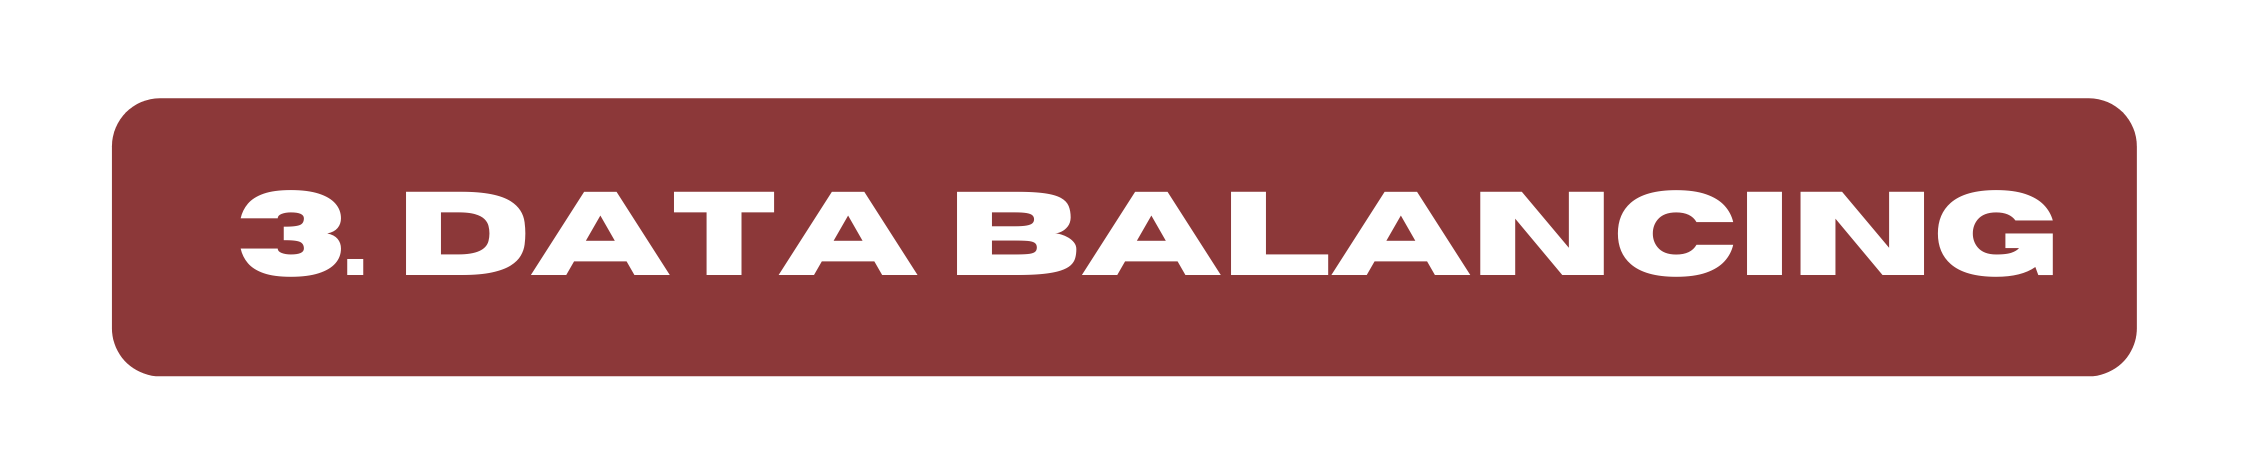
</div>

<font color='blood red'><font size="5">SMOTE<br /><br />

In [188]:
df1 = df.copy()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3566 entries, 0 to 5108
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  3566 non-null   int64  
 1   gender              3566 non-null   object 
 2   age                 3566 non-null   float64
 3   hypertension        3566 non-null   int64  
 4   heart_disease       3566 non-null   int64  
 5   ever_married        3566 non-null   object 
 6   work_type           3566 non-null   object 
 7   Residence_type      3566 non-null   object 
 8   avg_glucose_level   3566 non-null   float64
 9   bmi                 3566 non-null   float64
 10  smoking_status      3566 non-null   object 
 11  stroke              3566 non-null   int64  
 12  gender_Cat          3566 non-null   int64  
 13  married_Cat         3566 non-null   int64  
 14  worktype_Cat        3566 non-null   int64  
 15  Residence_type_Cat  3566 non-null   int64  
 16  smokin

In [189]:
from imblearn.over_sampling import SMOTE
X=df1.copy().drop(['hypertension','id', 'gender','ever_married', 'work_type','Residence_type','smoking_status'],axis=1)
y=df1['hypertension']
smote = SMOTE()

X_balanced, X_test, Y_balanced, y_test = train_test_split(X,y, test_size = 0.2)
X_train_balanced, Y_train_balanced = smote.fit_resample(X_balanced, Y_balanced)

X_train_balanced_list=X_train_balanced.columns.values.tolist()

print(X_train_balanced_list)

['age', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke', 'gender_Cat', 'married_Cat', 'worktype_Cat', 'Residence_type_Cat', 'smoking_status_Cat']


In [190]:
X_train_balanced.shape

(4968, 10)

In [191]:
from collections import Counter
print(Counter(Y_train_balanced))
print(Counter(y_test))

Counter({0: 2484, 1: 2484})
Counter({0: 636, 1: 78})


In [192]:
X_train_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4968 entries, 0 to 4967
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 4968 non-null   float64
 1   heart_disease       4968 non-null   int64  
 2   avg_glucose_level   4968 non-null   float64
 3   bmi                 4968 non-null   float64
 4   stroke              4968 non-null   int64  
 5   gender_Cat          4968 non-null   int64  
 6   married_Cat         4968 non-null   int64  
 7   worktype_Cat        4968 non-null   int64  
 8   Residence_type_Cat  4968 non-null   int64  
 9   smoking_status_Cat  4968 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 388.2 KB


In [193]:
from sklearn.decomposition import PCA
class sampling():
    
    def __init__(self,feat,tar,method,ax): 
        self.feat = feat
        self.tar = tar
        self.method = method
        self.ax = ax
    
        
    # under sampling visualization

    def visualize_data(self):
        
        temp_y = pd.DataFrame({'y':self.tar})
        
        # dimension reduction
        pca = PCA(n_components= 2).fit_transform(self.feat)
        
        self.ax.set_facecolor('#f5f6f6')
        # plotting4
        self.ax.scatter(pca[temp_y['y'] == 0][:,0], pca[temp_y['y'] == 0][:,1], c = '#512b58', s = 10)
        self.ax.scatter(pca[temp_y['y'] == 1][:,0], pca[temp_y['y'] == 1][:,1], c = '#ff005c', s =10)
        
        for loc in ['left','right','top', 'bottom']:
            self.ax.spines[loc].set_visible(False)
        self.ax.axes.get_xaxis().set_visible(False)
        self.ax.axes.get_yaxis().set_visible(False)
        self.ax.set_xticklabels('')
        self.ax.set_yticklabels('')
        self.ax.set_xlim(xmin = -6, xmax = 6)
        self.ax.set_ylim(ymin = -5, ymax = 6)

    
        self.ax.text(1.6,3.8,"Stroke", fontweight="bold", fontfamily='serif', fontsize=13, color='#ff005c')
        self.ax.text(3.2,3.8,"|", fontweight="bold", fontfamily='serif', fontsize=13, color='black')
        self.ax.text(3.4,3.8,"No stroke", fontweight="bold", fontfamily='serif', fontsize=13, color='#512b58')
        self.ax.text(-6,5.5,self.method, {'font': 'serif', 'weight': 'bold', 'size': 20}, alpha = 0.8)
        self.ax.text(-6,4.5,'{} contain {} number of datapoint, \nand targets distribution as {}.'.format(self.method,len(self.feat), {0:Counter(self.tar)[0],1:Counter(self.tar)[1]}), {'font': 'serif', 'weight': 'normal', 'size': 12}, alpha = 0.7)
        

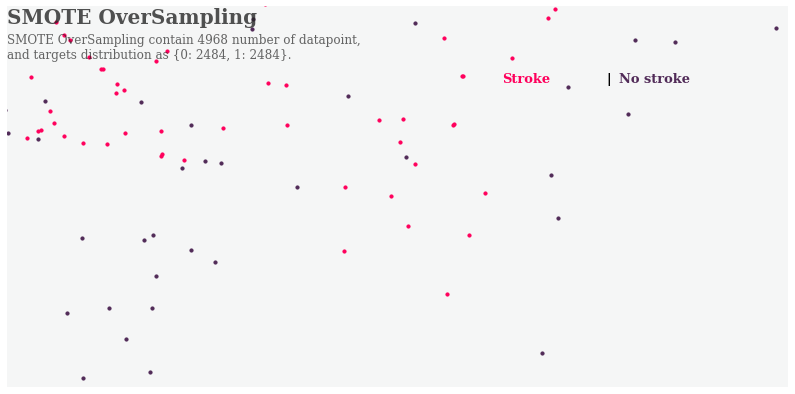

In [194]:
fig = plt.figure(figsize =(14,7))
gs = fig.add_gridspec(1,1)
gs.update(wspace = 0.1, hspace = 0.1)
ax1 = fig.add_subplot(gs[0,0])
axes = [ax1]
sampling(X_train_balanced, Y_train_balanced,'SMOTE OverSampling',ax=ax1).visualize_data() 

<a id='4'></a>
<div>
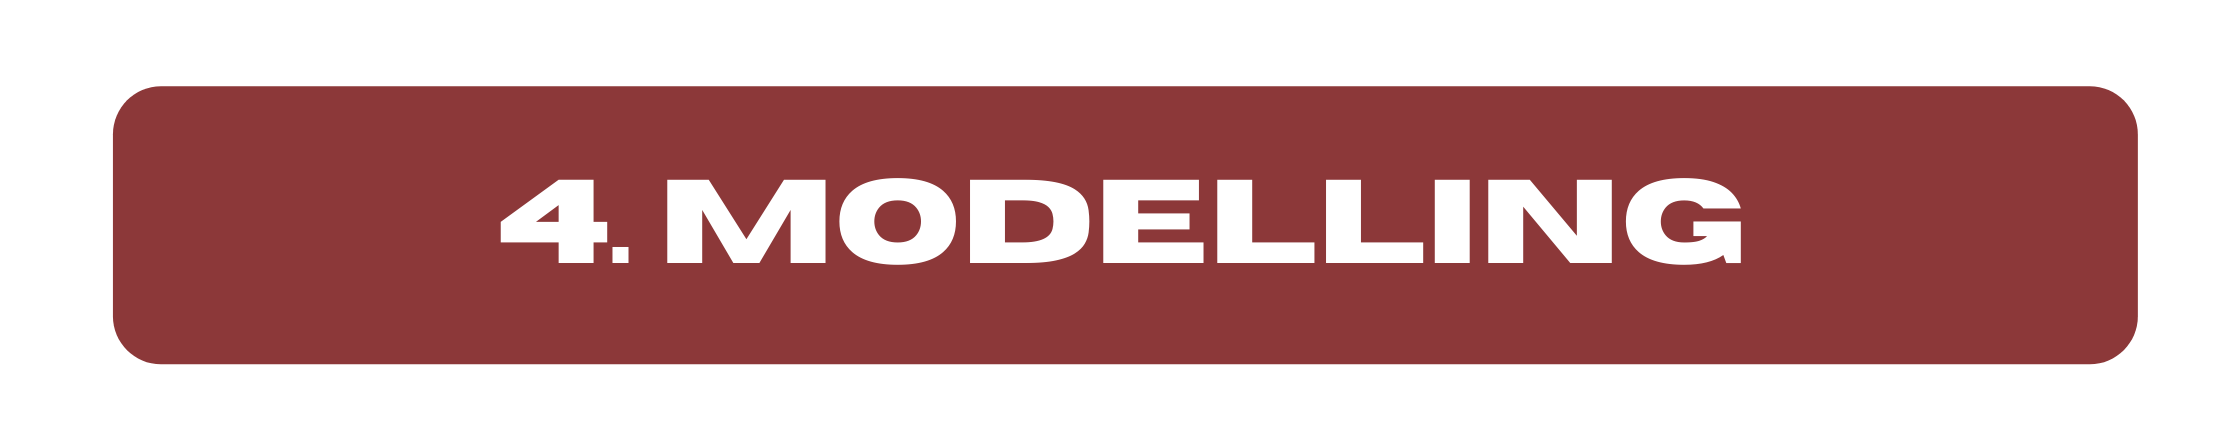
</div>

<a id='4.1'></a>
<div>
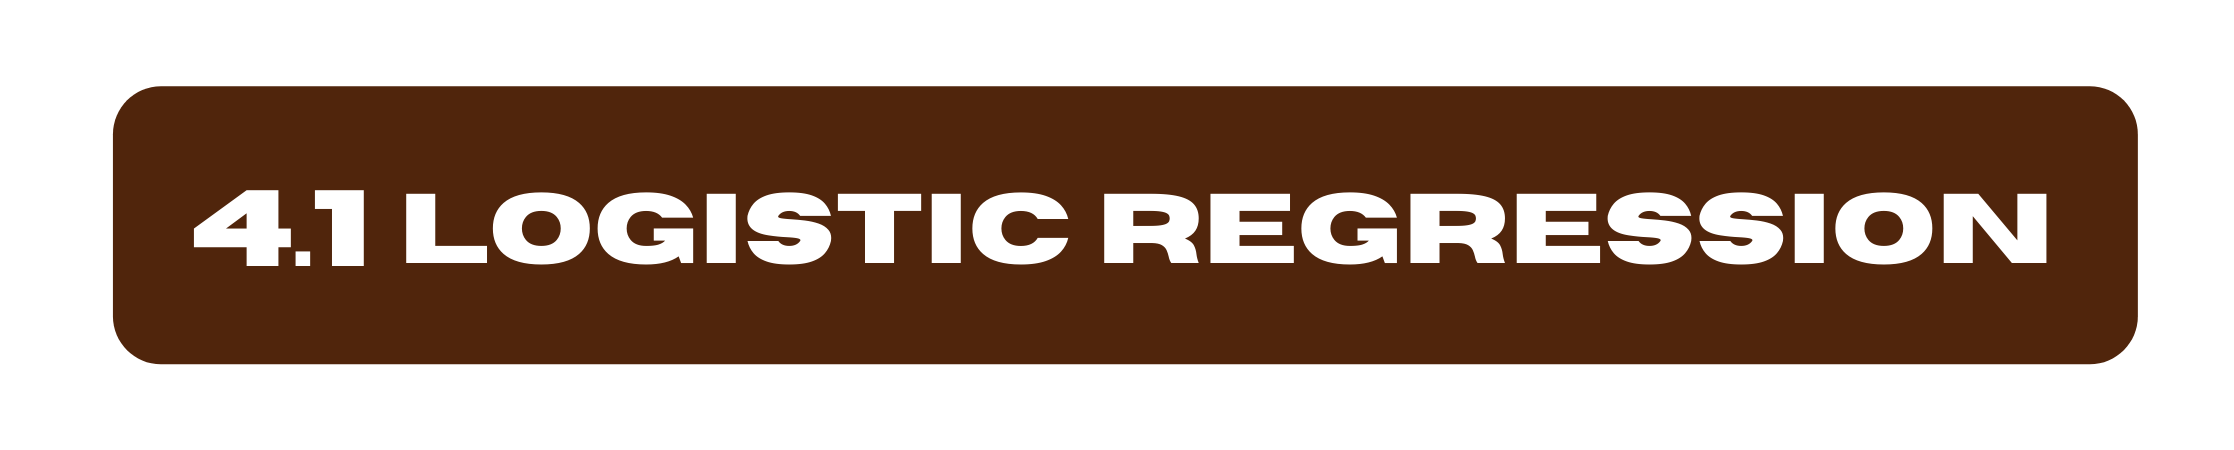
</div>

In [247]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=600)
rfe = RFE(estimator=model, n_features_to_select=4)
fit = rfe.fit(X_train_balanced, Y_train_balanced)
print("Num Features: %s" % (fit.n_features_))
features = {'Features': X_train_balanced_list,'Selected Features':fit.support_ ,'Feature Ranking':fit.ranking_}
rfe_df = pd.DataFrame(features)
rfe_df
# got issues adding in the feature importance coefficients into the dataframe model.estimator_.coeff_

Num Features: 4


Features  Selected Features  Feature Ranking
0                 age              False                6
1       heart_disease              False                3
2   avg_glucose_level              False                7
3                 bmi              False                5
4              stroke              False                4
5          gender_Cat               True                1
6         married_Cat               True                1
7        worktype_Cat              False                2
8  Residence_type_Cat               True                1
9  smoking_status_Cat               True                1

<font color='blood red'><font size="5">Features picked by RFE: gender, married, residence type and smoking status<br /><br />

<font color='blood red'><font size="5">which should we focus on?

- <font color='blood red'><font size="3"> Precision = (True Positive) / (Total predicted positive)
   
- <font color='blood red'><font size="3"> Recall = (True Positive) / (Total actual positive)

- <font color='blood red'><font size="3"> F1 = 2* ( precision * recall) / (precision + recall)

<font color='blood red'><font size="4"> Since we are predicting hypertension, the impact of False Negatives are much more undesirable as compared to False Positives. It is worse for a patient to go undiagnosed and fail to receive proper treatment, than to have a minor false scare about having hypertension. (when one does not have it)
Thus it makes sense to focus more on Recall instead of Precision.

<font color='blood red'><font size="4"> However, precision can tell us how accurate/precise our model is out of those predicted positive, how many are actual positive, which is an important aspect too.

<font color='blood red'><font size="4"> F1 score allows us to seek a balance between Precision and Recall. While it may seem like a good measure, this means that we are compromising on Recall.
    
<font color='blood red'><font size="4"> Going back to the reasons why we wanted to do this project, hypertension is like a 'silent killer', thus our priority should be on minimising the number of False Negatives.
    
<font color='blood red'><font size="5">
Hence, we focus on Recall scores.

In [248]:
fit1 = model.fit(X_train_balanced, Y_train_balanced)
y_pred1 = fit1.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.93      0.75      0.83       636
           1       0.22      0.56      0.32        78

    accuracy                           0.73       714
   macro avg       0.58      0.66      0.57       714
weighted avg       0.86      0.73      0.78       714



In [201]:
y_pred = fit.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.56      0.69       636
           1       0.14      0.58      0.22        78

    accuracy                           0.56       714
   macro avg       0.53      0.57      0.46       714
weighted avg       0.83      0.56      0.64       714



<AxesSubplot:>

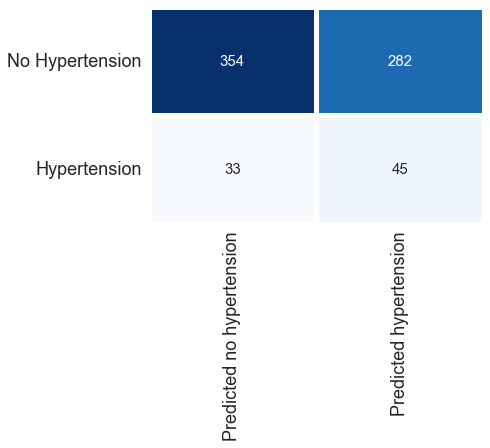

In [202]:
lr_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(lr_cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No Hypertension', 'Hypertension'], xticklabels = ['Predicted no hypertension', 'Predicted hypertension'])

<font color='blood red'><font size="5">as seen from our classification report,
- <font color='blood red'><font size="4"> The support values show that our dataset is not well-balanced. Majority of the dataset is class 0, which is no hypertension.
- <font color='blood red'><font size="4"> our recall score shows that logistic regression is balanced at predicting hypertension and no hypertension. (0.58 vs 0.56)

<font color='blood red'><font size="5">as seen in our confusion matrix,
- <font color='blood red'><font size="4"> number of false negatives and true positives are low. ( 33 , 45 )
- <font color='blood red'><font size="4"> number of true negatives and false positives are high. ( 354 , 282 )

<a id='4.2'></a>
<div>
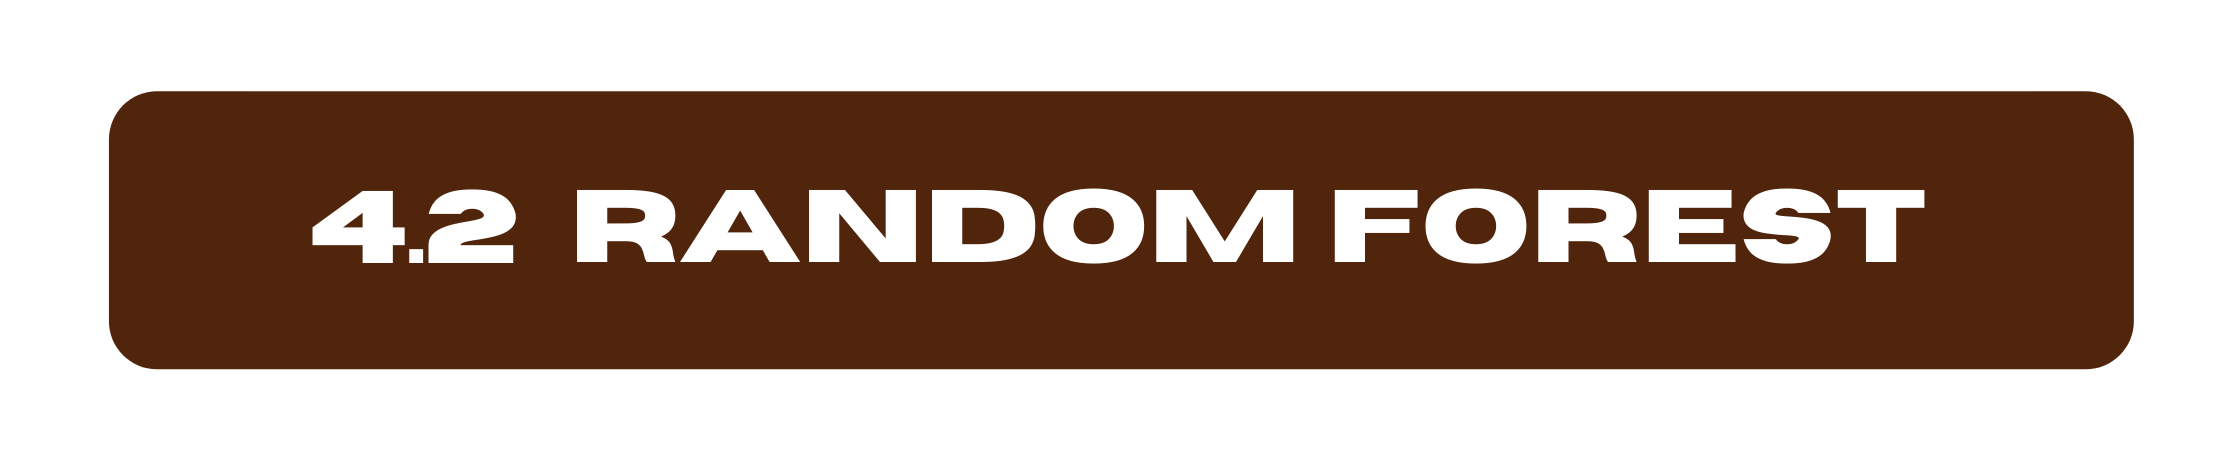
</div>

In [203]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=10)
model.fit(X_train_balanced, Y_train_balanced)


RandomForestClassifier(n_estimators=10)

In [204]:
rfe2 = RFE(estimator=model, n_features_to_select=4)
fit2 = rfe2.fit(X_train_balanced, Y_train_balanced)
print("Num Features: %s" % (fit.n_features_))
features = {'Features': X_train_balanced_list,'Selected Features':fit.support_ ,'Feature Ranking':fit.ranking_}
rfe_df2 = pd.DataFrame(features)
rfe_df2

Num Features: 4


Features  Selected Features  Feature Ranking
0                 age              False                6
1       heart_disease              False                3
2   avg_glucose_level              False                7
3                 bmi              False                5
4              stroke              False                4
5          gender_Cat               True                1
6         married_Cat               True                1
7        worktype_Cat              False                2
8  Residence_type_Cat               True                1
9  smoking_status_Cat               True                1

<font color='blood red'><font size="5">Features picked by RFE: gender, married, residence type and smoking status<br /><br />

In [205]:
y_pred1 = fit2.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88       636
           1       0.22      0.35      0.27        78

    accuracy                           0.79       714
   macro avg       0.57      0.60      0.57       714
weighted avg       0.84      0.79      0.81       714



In [206]:
model.score(X_test, y_test)

0.819327731092437

In [207]:
y_pred=model.predict(X_test)

In [208]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.87      0.90       636
           1       0.27      0.38      0.32        78

    accuracy                           0.82       714
   macro avg       0.60      0.63      0.61       714
weighted avg       0.85      0.82      0.83       714



<AxesSubplot:>

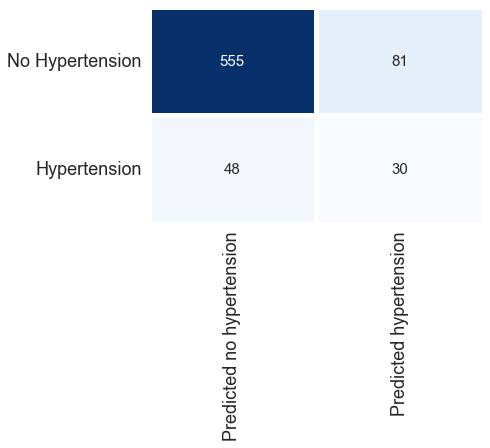

In [209]:
rf_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(rf_cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No Hypertension', 'Hypertension'], xticklabels = ['Predicted no hypertension', 'Predicted hypertension'])


<font color='blood red'><font size="5">as seen from our classification report,
- <font color='blood red'><font size="4"> The support values show that our dataset is not well-balanced. Majority of the dataset is class 0, which is no hypertension.
- <font color='blood red'><font size="4"> our recall score for class 1 (hypertension) is significantly lower than for class 0 (no hypertension). which means random forest only detected 38% of all those who have hypertension.

<font color='blood red'><font size="5">as seen in our confusion matrix,
- <font color='blood red'><font size="4"> number of false negatives and true positives are low. ( 48 , 30 )
- <font color='blood red'><font size="4"> number of true negatives and false positives are high. ( 555 , 81 )

<a id='4.3'></a>
<div>
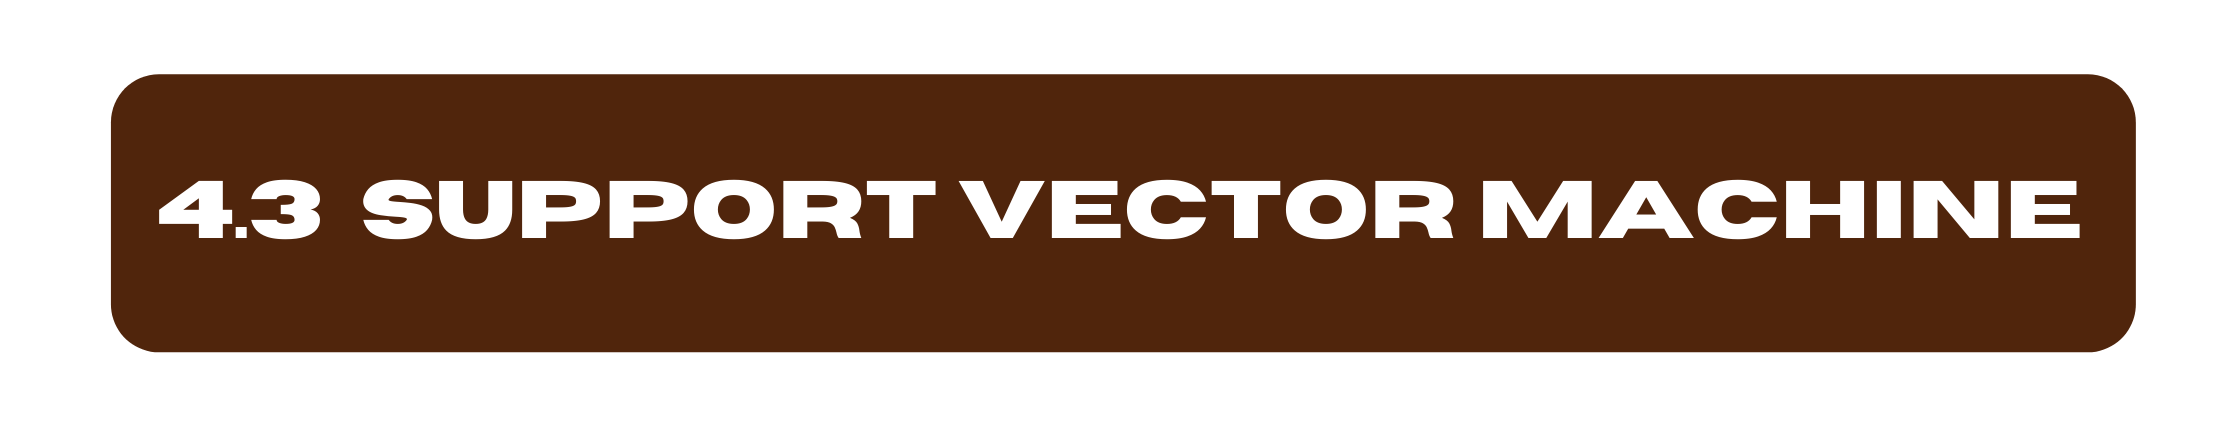
</div>

# Support Vector Machine

In [250]:
svc = SVC()
svc.fit(X_train_balanced, Y_train_balanced)
y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.59      0.73       636
           1       0.20      0.86      0.33        78

    accuracy                           0.62       714
   macro avg       0.59      0.72      0.53       714
weighted avg       0.89      0.62      0.69       714



<AxesSubplot:>

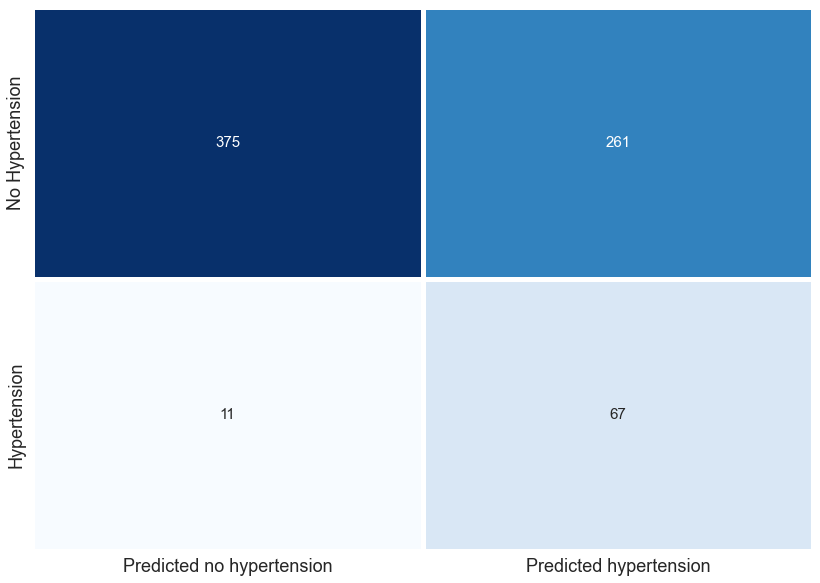

In [251]:
svc_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(svc_cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No Hypertension', 'Hypertension'], xticklabels = ['Predicted no hypertension', 'Predicted hypertension'])

<font color='blood red'><font size="5">as seen from our classification report,
- <font color='blood red'><font size="4"> The support values show that our dataset is not well-balanced. Majority of the dataset is class 0, which is no hypertension.
- <font color='blood red'><font size="4"> our recall score for class 1 (hypertension) is much higher than for class 0 (no hypertension). (0.86 vs 0.59)

<font color='blood red'><font size="5">as seen in our confusion matrix,
- <font color='blood red'><font size="4"> number of false negatives and true positives are low. ( 11 , 67 )
- <font color='blood red'><font size="4"> number of true negatives and false positives are high. ( 375 , 261 )

<a id='4.4'></a>
<div>
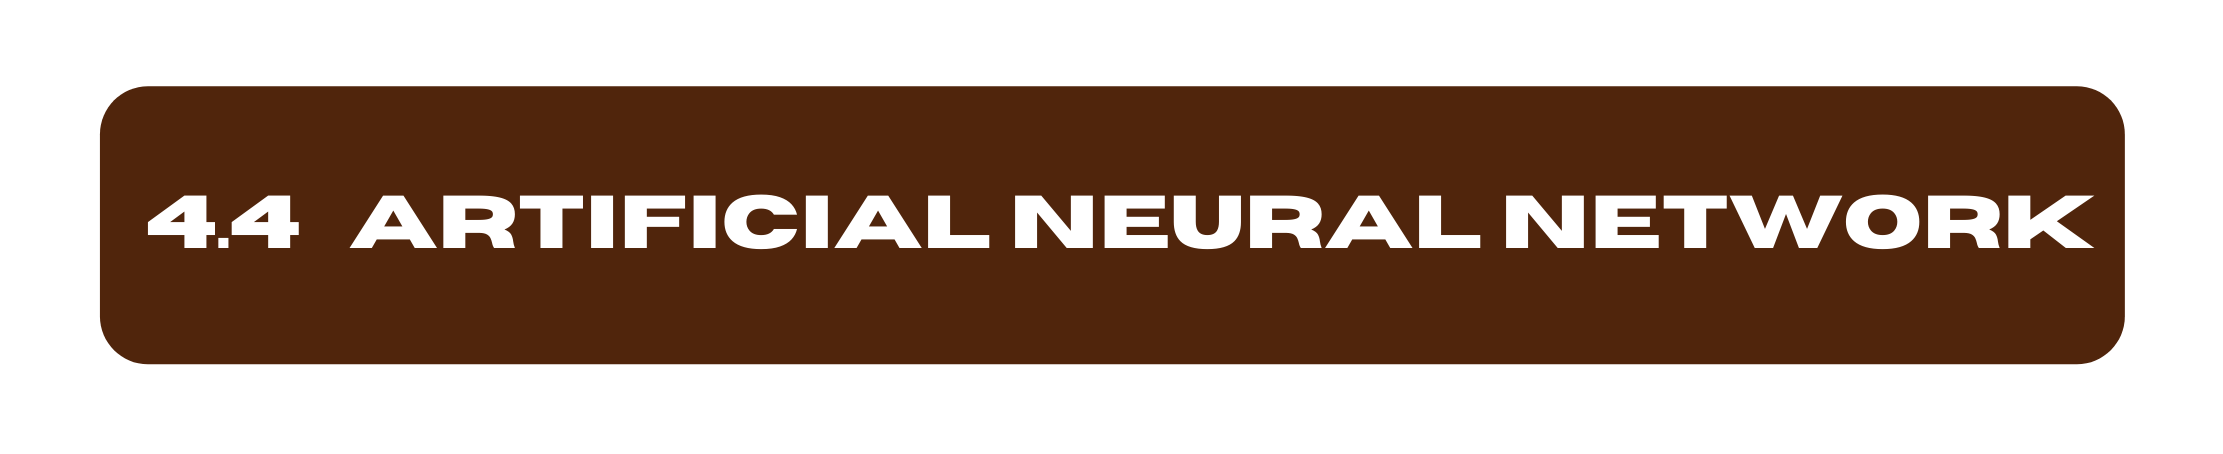
</div>

# Artificial Neural Network

In [252]:
import tensorflow as tf
from tensorflow import keras

#the line below fixes kernal appears to have died problem
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [253]:
dropout = 0.1
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(X_train_balanced.shape[-1],)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dropout(dropout),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dropout(dropout),         
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dropout(dropout),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dropout(dropout),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(
    optimizer=opt,
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [254]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 10)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dropout_4 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 88        
_________________________________________________________________
dropout_5 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 54        
_________________________________________________________________
dropout_6 (Dropout)          (None, 6)                

In [255]:

history1 = model.fit(X_train_balanced, Y_train_balanced, epochs=1000, batch_size=X_train_balanced.size//200, verbose=2, 
                      validation_data=(X_test, y_test))


Epoch 1/1000
21/21 - 0s - loss: 1.4115 - accuracy: 0.4942 - val_loss: 0.7003 - val_accuracy: 0.1092
Epoch 2/1000
21/21 - 0s - loss: 0.7225 - accuracy: 0.4992 - val_loss: 0.6795 - val_accuracy: 0.8908
Epoch 3/1000
21/21 - 0s - loss: 0.6974 - accuracy: 0.5038 - val_loss: 0.6765 - val_accuracy: 0.8908
Epoch 4/1000
21/21 - 0s - loss: 0.6972 - accuracy: 0.5012 - val_loss: 0.6876 - val_accuracy: 0.8908
Epoch 5/1000
21/21 - 0s - loss: 0.6972 - accuracy: 0.4978 - val_loss: 0.6964 - val_accuracy: 0.1092
Epoch 6/1000
21/21 - 0s - loss: 0.6968 - accuracy: 0.4954 - val_loss: 0.6885 - val_accuracy: 0.8908
Epoch 7/1000
21/21 - 0s - loss: 0.6929 - accuracy: 0.5062 - val_loss: 0.6909 - val_accuracy: 0.8908
Epoch 8/1000
21/21 - 0s - loss: 0.6948 - accuracy: 0.5083 - val_loss: 0.6882 - val_accuracy: 0.8908
Epoch 9/1000
21/21 - 0s - loss: 0.6919 - accuracy: 0.5111 - val_loss: 0.6900 - val_accuracy: 0.8908
Epoch 10/1000
21/21 - 0s - loss: 0.6960 - accuracy: 0.4984 - val_loss: 0.6711 - val_accuracy: 0.8880

Epoch 83/1000
21/21 - 0s - loss: 0.5490 - accuracy: 0.7273 - val_loss: 0.4689 - val_accuracy: 0.8151
Epoch 84/1000
21/21 - 0s - loss: 0.5552 - accuracy: 0.7152 - val_loss: 0.5135 - val_accuracy: 0.7647
Epoch 85/1000
21/21 - 0s - loss: 0.5465 - accuracy: 0.7317 - val_loss: 0.4785 - val_accuracy: 0.7899
Epoch 86/1000
21/21 - 0s - loss: 0.5514 - accuracy: 0.7325 - val_loss: 0.4792 - val_accuracy: 0.8067
Epoch 87/1000
21/21 - 0s - loss: 0.5674 - accuracy: 0.7051 - val_loss: 0.4709 - val_accuracy: 0.7773
Epoch 88/1000
21/21 - 0s - loss: 0.5563 - accuracy: 0.7156 - val_loss: 0.5324 - val_accuracy: 0.7073
Epoch 89/1000
21/21 - 0s - loss: 0.5780 - accuracy: 0.6814 - val_loss: 0.6040 - val_accuracy: 0.6261
Epoch 90/1000
21/21 - 0s - loss: 0.5641 - accuracy: 0.7178 - val_loss: 0.4960 - val_accuracy: 0.7409
Epoch 91/1000
21/21 - 0s - loss: 0.5485 - accuracy: 0.7156 - val_loss: 0.4651 - val_accuracy: 0.7829
Epoch 92/1000
21/21 - 0s - loss: 0.5501 - accuracy: 0.7162 - val_loss: 0.4817 - val_accurac

Epoch 164/1000
21/21 - 0s - loss: 0.5279 - accuracy: 0.7426 - val_loss: 0.4292 - val_accuracy: 0.7871
Epoch 165/1000
21/21 - 0s - loss: 0.5305 - accuracy: 0.7363 - val_loss: 0.4922 - val_accuracy: 0.7171
Epoch 166/1000
21/21 - 0s - loss: 0.5379 - accuracy: 0.7212 - val_loss: 0.5145 - val_accuracy: 0.6989
Epoch 167/1000
21/21 - 0s - loss: 0.5309 - accuracy: 0.7363 - val_loss: 0.5092 - val_accuracy: 0.7045
Epoch 168/1000
21/21 - 0s - loss: 0.5277 - accuracy: 0.7303 - val_loss: 0.4920 - val_accuracy: 0.7087
Epoch 169/1000
21/21 - 0s - loss: 0.5279 - accuracy: 0.7359 - val_loss: 0.5334 - val_accuracy: 0.6625
Epoch 170/1000
21/21 - 0s - loss: 0.5492 - accuracy: 0.7116 - val_loss: 0.4681 - val_accuracy: 0.7647
Epoch 171/1000
21/21 - 0s - loss: 0.5533 - accuracy: 0.7085 - val_loss: 0.4764 - val_accuracy: 0.7507
Epoch 172/1000
21/21 - 0s - loss: 0.5347 - accuracy: 0.7399 - val_loss: 0.4860 - val_accuracy: 0.7185
Epoch 173/1000
21/21 - 0s - loss: 0.5326 - accuracy: 0.7353 - val_loss: 0.4845 - v

Epoch 245/1000
21/21 - 0s - loss: 0.5174 - accuracy: 0.7428 - val_loss: 0.4449 - val_accuracy: 0.7521
Epoch 246/1000
21/21 - 0s - loss: 0.5180 - accuracy: 0.7454 - val_loss: 0.4795 - val_accuracy: 0.7171
Epoch 247/1000
21/21 - 0s - loss: 0.5241 - accuracy: 0.7428 - val_loss: 0.4526 - val_accuracy: 0.7479
Epoch 248/1000
21/21 - 0s - loss: 0.5261 - accuracy: 0.7413 - val_loss: 0.5061 - val_accuracy: 0.6891
Epoch 249/1000
21/21 - 0s - loss: 0.5306 - accuracy: 0.7299 - val_loss: 0.4742 - val_accuracy: 0.7199
Epoch 250/1000
21/21 - 0s - loss: 0.5252 - accuracy: 0.7415 - val_loss: 0.4179 - val_accuracy: 0.7885
Epoch 251/1000
21/21 - 0s - loss: 0.5269 - accuracy: 0.7365 - val_loss: 0.4807 - val_accuracy: 0.7269
Epoch 252/1000
21/21 - 0s - loss: 0.5250 - accuracy: 0.7470 - val_loss: 0.4657 - val_accuracy: 0.7353
Epoch 253/1000
21/21 - 0s - loss: 0.5238 - accuracy: 0.7413 - val_loss: 0.4971 - val_accuracy: 0.7115
Epoch 254/1000
21/21 - 0s - loss: 0.5179 - accuracy: 0.7399 - val_loss: 0.5648 - v

Epoch 326/1000
21/21 - 0s - loss: 0.5381 - accuracy: 0.7373 - val_loss: 0.4559 - val_accuracy: 0.7703
Epoch 327/1000
21/21 - 0s - loss: 0.5274 - accuracy: 0.7470 - val_loss: 0.5533 - val_accuracy: 0.7017
Epoch 328/1000
21/21 - 0s - loss: 0.5349 - accuracy: 0.7359 - val_loss: 0.6073 - val_accuracy: 0.6611
Epoch 329/1000
21/21 - 0s - loss: 0.5336 - accuracy: 0.7365 - val_loss: 0.4880 - val_accuracy: 0.7269
Epoch 330/1000
21/21 - 0s - loss: 0.5272 - accuracy: 0.7500 - val_loss: 0.4377 - val_accuracy: 0.7941
Epoch 331/1000
21/21 - 0s - loss: 0.5288 - accuracy: 0.7401 - val_loss: 0.4659 - val_accuracy: 0.7549
Epoch 332/1000
21/21 - 0s - loss: 0.5278 - accuracy: 0.7397 - val_loss: 0.5637 - val_accuracy: 0.6793
Epoch 333/1000
21/21 - 0s - loss: 0.5310 - accuracy: 0.7353 - val_loss: 0.4661 - val_accuracy: 0.7661
Epoch 334/1000
21/21 - 0s - loss: 0.5286 - accuracy: 0.7436 - val_loss: 0.4397 - val_accuracy: 0.7857
Epoch 335/1000
21/21 - 0s - loss: 0.5269 - accuracy: 0.7383 - val_loss: 0.5882 - v

Epoch 407/1000
21/21 - 0s - loss: 0.5151 - accuracy: 0.7504 - val_loss: 0.5658 - val_accuracy: 0.6975
Epoch 408/1000
21/21 - 0s - loss: 0.5212 - accuracy: 0.7472 - val_loss: 0.4440 - val_accuracy: 0.7885
Epoch 409/1000
21/21 - 0s - loss: 0.5468 - accuracy: 0.7325 - val_loss: 0.4737 - val_accuracy: 0.7717
Epoch 410/1000
21/21 - 0s - loss: 0.5277 - accuracy: 0.7450 - val_loss: 0.4429 - val_accuracy: 0.7955
Epoch 411/1000
21/21 - 0s - loss: 0.5190 - accuracy: 0.7520 - val_loss: 0.4467 - val_accuracy: 0.7843
Epoch 412/1000
21/21 - 0s - loss: 0.5286 - accuracy: 0.7442 - val_loss: 0.5272 - val_accuracy: 0.7185
Epoch 413/1000
21/21 - 0s - loss: 0.5247 - accuracy: 0.7498 - val_loss: 0.4716 - val_accuracy: 0.7731
Epoch 414/1000
21/21 - 0s - loss: 0.5152 - accuracy: 0.7504 - val_loss: 0.5183 - val_accuracy: 0.7297
Epoch 415/1000
21/21 - 0s - loss: 0.5140 - accuracy: 0.7492 - val_loss: 0.5260 - val_accuracy: 0.7087
Epoch 416/1000
21/21 - 0s - loss: 0.5156 - accuracy: 0.7474 - val_loss: 0.5830 - v

Epoch 488/1000
21/21 - 0s - loss: 0.5270 - accuracy: 0.7442 - val_loss: 0.5112 - val_accuracy: 0.7437
Epoch 489/1000
21/21 - 0s - loss: 0.5098 - accuracy: 0.7478 - val_loss: 0.4980 - val_accuracy: 0.7563
Epoch 490/1000
21/21 - 0s - loss: 0.5111 - accuracy: 0.7570 - val_loss: 0.4586 - val_accuracy: 0.7899
Epoch 491/1000
21/21 - 0s - loss: 0.5236 - accuracy: 0.7385 - val_loss: 0.4546 - val_accuracy: 0.7969
Epoch 492/1000
21/21 - 0s - loss: 0.5242 - accuracy: 0.7438 - val_loss: 0.4422 - val_accuracy: 0.7983
Epoch 493/1000
21/21 - 0s - loss: 0.5147 - accuracy: 0.7502 - val_loss: 0.4988 - val_accuracy: 0.7661
Epoch 494/1000
21/21 - 0s - loss: 0.5139 - accuracy: 0.7520 - val_loss: 0.5008 - val_accuracy: 0.7535
Epoch 495/1000
21/21 - 0s - loss: 0.5175 - accuracy: 0.7492 - val_loss: 0.5124 - val_accuracy: 0.7129
Epoch 496/1000
21/21 - 0s - loss: 0.5300 - accuracy: 0.7367 - val_loss: 0.5400 - val_accuracy: 0.7465
Epoch 497/1000
21/21 - 0s - loss: 0.5165 - accuracy: 0.7500 - val_loss: 0.4331 - v

Epoch 569/1000
21/21 - 0s - loss: 0.5222 - accuracy: 0.7434 - val_loss: 0.5309 - val_accuracy: 0.7269
Epoch 570/1000
21/21 - 0s - loss: 0.5296 - accuracy: 0.7432 - val_loss: 0.5019 - val_accuracy: 0.7283
Epoch 571/1000
21/21 - 0s - loss: 0.5200 - accuracy: 0.7484 - val_loss: 0.5327 - val_accuracy: 0.7073
Epoch 572/1000
21/21 - 0s - loss: 0.5311 - accuracy: 0.7430 - val_loss: 0.5444 - val_accuracy: 0.7003
Epoch 573/1000
21/21 - 0s - loss: 0.5299 - accuracy: 0.7474 - val_loss: 0.4813 - val_accuracy: 0.7549
Epoch 574/1000
21/21 - 0s - loss: 0.5360 - accuracy: 0.7313 - val_loss: 0.4595 - val_accuracy: 0.7941
Epoch 575/1000
21/21 - 0s - loss: 0.5500 - accuracy: 0.7434 - val_loss: 0.4792 - val_accuracy: 0.7787
Epoch 576/1000
21/21 - 0s - loss: 0.5306 - accuracy: 0.7452 - val_loss: 0.5279 - val_accuracy: 0.6975
Epoch 577/1000
21/21 - 0s - loss: 0.5592 - accuracy: 0.7172 - val_loss: 0.5047 - val_accuracy: 0.7059
Epoch 578/1000
21/21 - 0s - loss: 0.5321 - accuracy: 0.7371 - val_loss: 0.5464 - v

Epoch 650/1000
21/21 - 0s - loss: 0.5153 - accuracy: 0.7504 - val_loss: 0.5029 - val_accuracy: 0.7493
Epoch 651/1000
21/21 - 0s - loss: 0.5044 - accuracy: 0.7589 - val_loss: 0.4816 - val_accuracy: 0.7591
Epoch 652/1000
21/21 - 0s - loss: 0.5127 - accuracy: 0.7597 - val_loss: 0.5195 - val_accuracy: 0.7451
Epoch 653/1000
21/21 - 0s - loss: 0.5057 - accuracy: 0.7597 - val_loss: 0.4901 - val_accuracy: 0.7395
Epoch 654/1000
21/21 - 0s - loss: 0.5212 - accuracy: 0.7526 - val_loss: 0.4689 - val_accuracy: 0.7759
Epoch 655/1000
21/21 - 0s - loss: 0.5053 - accuracy: 0.7560 - val_loss: 0.5792 - val_accuracy: 0.7213
Epoch 656/1000
21/21 - 0s - loss: 0.5260 - accuracy: 0.7474 - val_loss: 0.5643 - val_accuracy: 0.6835
Epoch 657/1000
21/21 - 0s - loss: 0.5219 - accuracy: 0.7476 - val_loss: 0.5190 - val_accuracy: 0.7045
Epoch 658/1000
21/21 - 0s - loss: 0.5153 - accuracy: 0.7502 - val_loss: 0.4825 - val_accuracy: 0.7563
Epoch 659/1000
21/21 - 0s - loss: 0.5081 - accuracy: 0.7568 - val_loss: 0.4788 - v

Epoch 731/1000
21/21 - 0s - loss: 0.5440 - accuracy: 0.7162 - val_loss: 0.4241 - val_accuracy: 0.8123
Epoch 732/1000
21/21 - 0s - loss: 0.5314 - accuracy: 0.7351 - val_loss: 0.4386 - val_accuracy: 0.8193
Epoch 733/1000
21/21 - 0s - loss: 0.5445 - accuracy: 0.7269 - val_loss: 0.4479 - val_accuracy: 0.8179
Epoch 734/1000
21/21 - 0s - loss: 0.5433 - accuracy: 0.7244 - val_loss: 0.5180 - val_accuracy: 0.7087
Epoch 735/1000
21/21 - 0s - loss: 0.5428 - accuracy: 0.7262 - val_loss: 0.4071 - val_accuracy: 0.8179
Epoch 736/1000
21/21 - 0s - loss: 0.5443 - accuracy: 0.7218 - val_loss: 0.4256 - val_accuracy: 0.8151
Epoch 737/1000
21/21 - 0s - loss: 0.5410 - accuracy: 0.7212 - val_loss: 0.4295 - val_accuracy: 0.8235
Epoch 738/1000
21/21 - 0s - loss: 0.5418 - accuracy: 0.7281 - val_loss: 0.4516 - val_accuracy: 0.8011
Epoch 739/1000
21/21 - 0s - loss: 0.5318 - accuracy: 0.7305 - val_loss: 0.4707 - val_accuracy: 0.8053
Epoch 740/1000
21/21 - 0s - loss: 0.5263 - accuracy: 0.7363 - val_loss: 0.4556 - v

Epoch 812/1000
21/21 - 0s - loss: 0.5432 - accuracy: 0.7244 - val_loss: 0.5134 - val_accuracy: 0.7479
Epoch 813/1000
21/21 - 0s - loss: 0.5248 - accuracy: 0.7357 - val_loss: 0.5033 - val_accuracy: 0.7983
Epoch 814/1000
21/21 - 0s - loss: 0.5356 - accuracy: 0.7258 - val_loss: 0.5408 - val_accuracy: 0.7535
Epoch 815/1000
21/21 - 0s - loss: 0.5360 - accuracy: 0.7347 - val_loss: 0.4568 - val_accuracy: 0.7871
Epoch 816/1000
21/21 - 0s - loss: 0.5235 - accuracy: 0.7381 - val_loss: 0.4982 - val_accuracy: 0.8011
Epoch 817/1000
21/21 - 0s - loss: 0.5324 - accuracy: 0.7343 - val_loss: 0.4583 - val_accuracy: 0.8109
Epoch 818/1000
21/21 - 0s - loss: 0.5363 - accuracy: 0.7273 - val_loss: 0.4732 - val_accuracy: 0.7941
Epoch 819/1000
21/21 - 0s - loss: 0.5340 - accuracy: 0.7315 - val_loss: 0.5084 - val_accuracy: 0.7493
Epoch 820/1000
21/21 - 0s - loss: 0.5354 - accuracy: 0.7337 - val_loss: 0.5019 - val_accuracy: 0.7885
Epoch 821/1000
21/21 - 0s - loss: 0.5319 - accuracy: 0.7331 - val_loss: 0.4900 - v

Epoch 893/1000
21/21 - 0s - loss: 0.5268 - accuracy: 0.7397 - val_loss: 0.4664 - val_accuracy: 0.8123
Epoch 894/1000
21/21 - 0s - loss: 0.5217 - accuracy: 0.7450 - val_loss: 0.4964 - val_accuracy: 0.7955
Epoch 895/1000
21/21 - 0s - loss: 0.5243 - accuracy: 0.7369 - val_loss: 0.4799 - val_accuracy: 0.8179
Epoch 896/1000
21/21 - 0s - loss: 0.5334 - accuracy: 0.7317 - val_loss: 0.5556 - val_accuracy: 0.7465
Epoch 897/1000
21/21 - 0s - loss: 0.5454 - accuracy: 0.7256 - val_loss: 0.4999 - val_accuracy: 0.7731
Epoch 898/1000
21/21 - 0s - loss: 0.5366 - accuracy: 0.7293 - val_loss: 0.4948 - val_accuracy: 0.8011
Epoch 899/1000
21/21 - 0s - loss: 0.5249 - accuracy: 0.7403 - val_loss: 0.5357 - val_accuracy: 0.7521
Epoch 900/1000
21/21 - 0s - loss: 0.5385 - accuracy: 0.7281 - val_loss: 0.4406 - val_accuracy: 0.8137
Epoch 901/1000
21/21 - 0s - loss: 0.5426 - accuracy: 0.7331 - val_loss: 0.4802 - val_accuracy: 0.7857
Epoch 902/1000
21/21 - 0s - loss: 0.5375 - accuracy: 0.7313 - val_loss: 0.5360 - v

Epoch 974/1000
21/21 - 0s - loss: 0.5456 - accuracy: 0.7291 - val_loss: 0.4395 - val_accuracy: 0.8039
Epoch 975/1000
21/21 - 0s - loss: 0.5390 - accuracy: 0.7297 - val_loss: 0.4296 - val_accuracy: 0.8095
Epoch 976/1000
21/21 - 0s - loss: 0.5408 - accuracy: 0.7273 - val_loss: 0.4193 - val_accuracy: 0.8319
Epoch 977/1000
21/21 - 0s - loss: 0.5420 - accuracy: 0.7329 - val_loss: 0.4945 - val_accuracy: 0.7423
Epoch 978/1000
21/21 - 0s - loss: 0.5374 - accuracy: 0.7291 - val_loss: 0.5105 - val_accuracy: 0.7409
Epoch 979/1000
21/21 - 0s - loss: 0.5430 - accuracy: 0.7260 - val_loss: 0.4580 - val_accuracy: 0.7801
Epoch 980/1000
21/21 - 0s - loss: 0.5417 - accuracy: 0.7162 - val_loss: 0.4844 - val_accuracy: 0.7465
Epoch 981/1000
21/21 - 0s - loss: 0.5413 - accuracy: 0.7238 - val_loss: 0.4546 - val_accuracy: 0.7955
Epoch 982/1000
21/21 - 0s - loss: 0.5357 - accuracy: 0.7335 - val_loss: 0.4767 - val_accuracy: 0.7633
Epoch 983/1000
21/21 - 0s - loss: 0.5357 - accuracy: 0.7323 - val_loss: 0.5235 - v

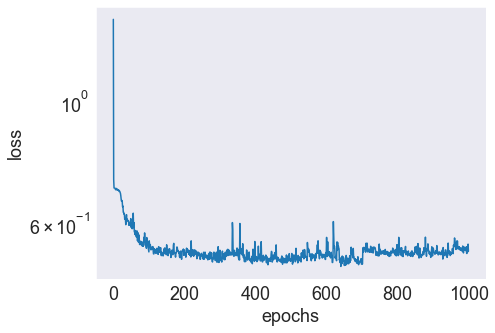

In [256]:
plt.rcParams['figure.figsize'] = 7, 5
grid = sns.lineplot(data = history1.history['loss'])
grid.set(yscale='log')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

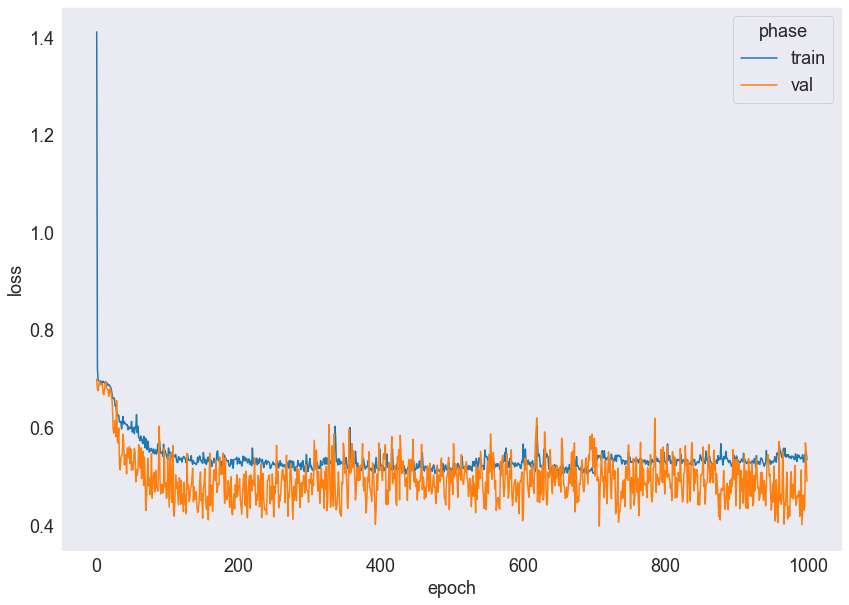

In [257]:

plt.rcParams['figure.figsize'] = 14, 10

df = pd.DataFrame(history1.history)
df['epoch'] = df.index
val_cols = [x for x in df.columns if x.startswith('val')]
df_val = df[val_cols+['epoch']]
df.drop(columns=val_cols, inplace=True)
df_val.rename(columns={col: col.split('val_')[-1] for col in df_val.columns}, inplace=True)
df['phase'] = 'train'
df_val['phase'] = 'val'
hist_df = pd.concat([df, df_val], ignore_index=True)

fig, axes = plt.subplots()

sns.lineplot(data = hist_df, x='epoch', y='loss', hue='phase')

plt.show()


In [258]:
y_pred = model.predict(X_test)
print(classification_report(y_test, np.around(y_pred)))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85       636
           1       0.22      0.47      0.30        78

    accuracy                           0.75       714
   macro avg       0.57      0.63      0.57       714
weighted avg       0.85      0.75      0.79       714



<AxesSubplot:>

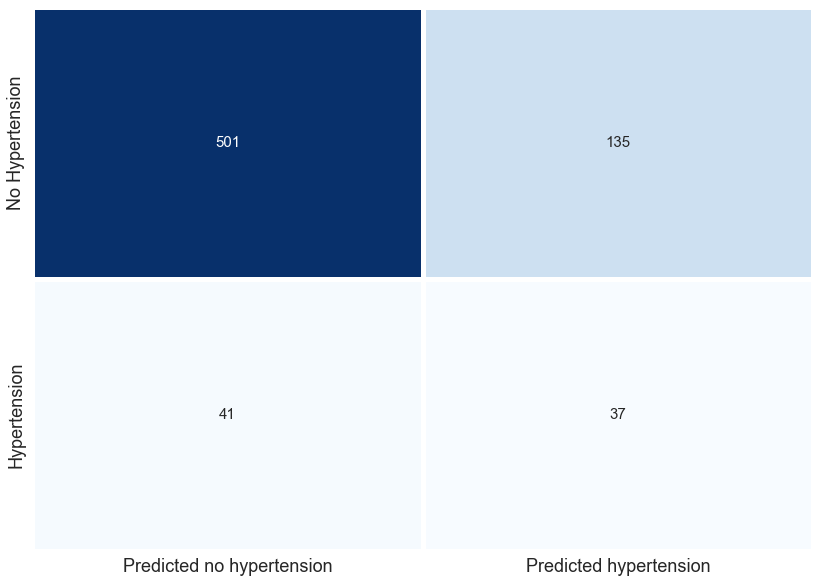

In [259]:
y_pred = model.predict(X_test)
ann_cm = confusion_matrix(y_test, np.around(y_pred))
sns.heatmap(ann_cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No Hypertension', 'Hypertension'], xticklabels = ['Predicted no hypertension', 'Predicted hypertension'])

<font color='blood red'><font size="5">as seen from our classification report,
- <font color='blood red'><font size="4"> The support values show that our dataset is not well-balanced. Majority of the dataset is class 0, which is no hypertension.
- <font color='blood red'><font size="4"> our recall score for class 1 (hypertension) is much lower than for class 0 (no hypertension). (0.47 vs 0.79)

<font color='blood red'><font size="5">as seen in our confusion matrix,
- <font color='blood red'><font size="4"> number of false negatives and true positives are low. ( 41 , 37 )
- <font color='blood red'><font size="4"> number of true negatives and false positives are high. ( 501 , 135 )

<a id='4.5'></a>
<div>
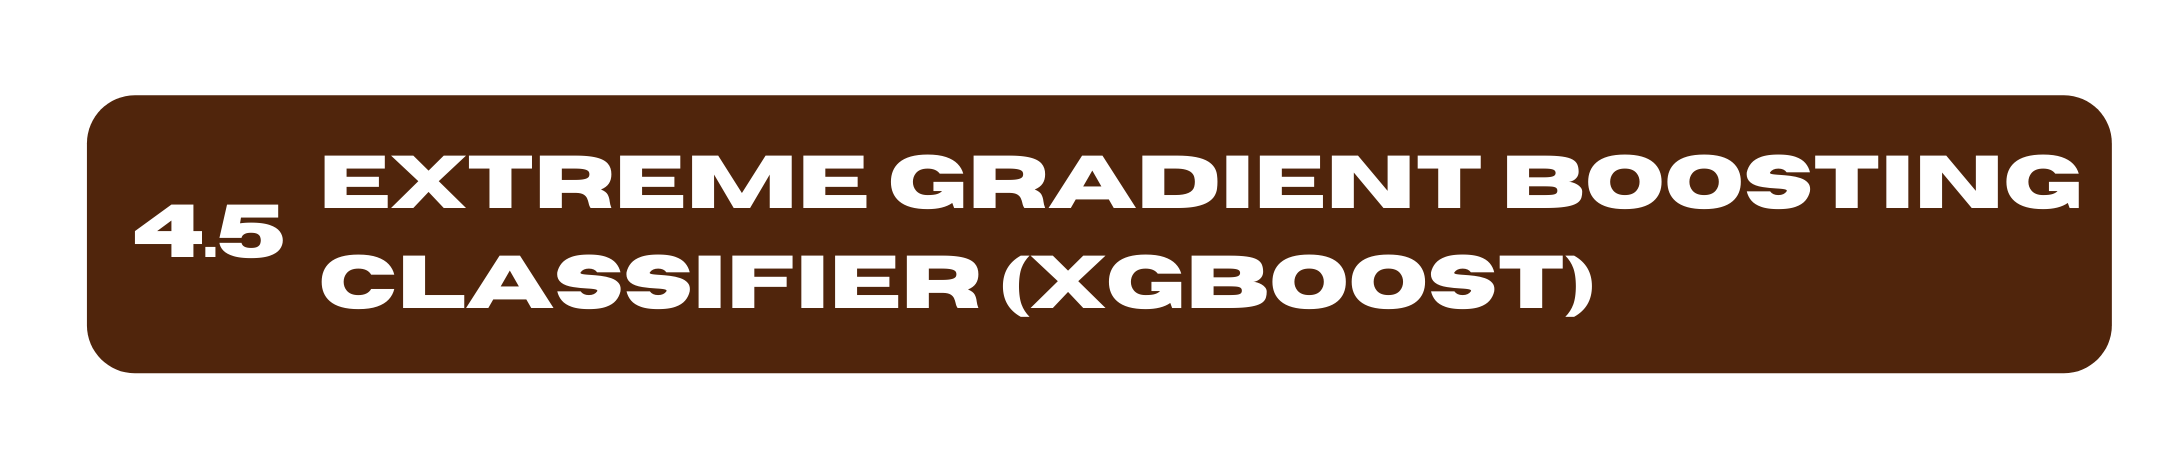
</div>

# eXtreme Gradient Boosting Classifier (XGBoost)

In [260]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state = 22, max_depth = 5, objective = 'binary:logistic', eval_metric = 'logloss')
xgb.fit(X_train_balanced, Y_train_balanced)
y_pred = xgb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       636
           1       0.19      0.23      0.21        78

    accuracy                           0.81       714
   macro avg       0.55      0.56      0.55       714
weighted avg       0.83      0.81      0.82       714



In [261]:
rfe3 = RFE(estimator=xgb, n_features_to_select=4)
fit3 = rfe3.fit(X_train_balanced, Y_train_balanced)
print("Num Features: %s" % (fit.n_features_))
features = {'Features': X_train_balanced_list,'Selected Features':fit.support_ ,'Feature Ranking':fit.ranking_}
rfe_df3 = pd.DataFrame(features)
rfe_df3

Num Features: 4


Features  Selected Features  Feature Ranking
0                 age              False                6
1       heart_disease              False                3
2   avg_glucose_level              False                7
3                 bmi              False                5
4              stroke              False                4
5          gender_Cat               True                1
6         married_Cat               True                1
7        worktype_Cat              False                2
8  Residence_type_Cat               True                1
9  smoking_status_Cat               True                1

In [262]:
y_pred3 = fit3.predict(X_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       636
           1       0.24      0.15      0.19        78

    accuracy                           0.85       714
   macro avg       0.57      0.55      0.55       714
weighted avg       0.83      0.85      0.84       714



<AxesSubplot:>

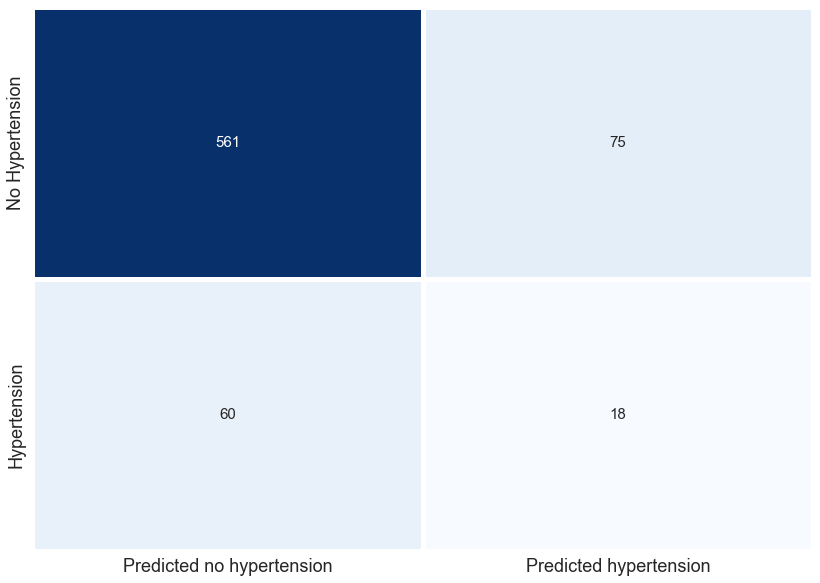

In [263]:
svc_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(svc_cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No Hypertension', 'Hypertension'], xticklabels = ['Predicted no hypertension', 'Predicted hypertension'])

<font color='blood red'><font size="5">as seen from our classification report,
- <font color='blood red'><font size="4"> The support values show that our dataset is not well-balanced. Majority of the dataset is class 0, which is no hypertension.
- <font color='blood red'><font size="4"> our recall score for class 1 (hypertension) is much higher than for class 0 (no hypertension). (0.94 vs 0.15)

<font color='blood red'><font size="5">as seen in our confusion matrix,
- <font color='blood red'><font size="4"> number of false negatives and true positives are low. ( 60 , 18 )
- <font color='blood red'><font size="4"> number of true negatives and false positives are high. ( 561 , 75 )

# K nearest Neighbours


In [264]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train_balanced, Y_train_balanced)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.70      0.80       636
           1       0.20      0.62      0.30        78

    accuracy                           0.69       714
   macro avg       0.57      0.66      0.55       714
weighted avg       0.86      0.69      0.75       714



<AxesSubplot:>

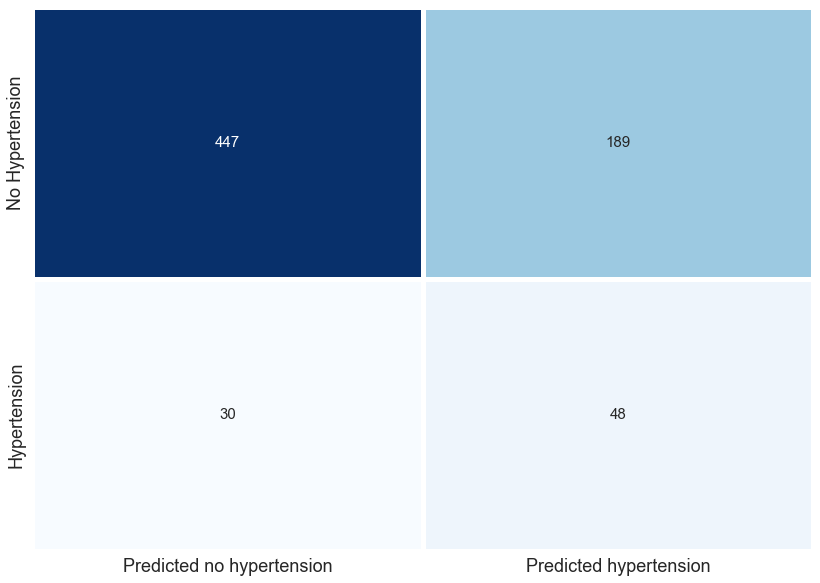

In [265]:
svc_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(svc_cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No Hypertension', 'Hypertension'], xticklabels = ['Predicted no hypertension', 'Predicted hypertension'])

<font color='blood red'><font size="5">as seen from our classification report,
- <font color='blood red'><font size="4"> The support values show that our dataset is not well-balanced. Majority of the dataset is class 0, which is no hypertension.
- <font color='blood red'><font size="4"> our recall score for class 1 (hypertension) is similar to class 0 (no hypertension). (0.62 vs 0.70)

<font color='blood red'><font size="5">as seen in our confusion matrix,
- <font color='blood red'><font size="4"> number of false negatives and true positives are low. ( 30 , 48 )
- <font color='blood red'><font size="4"> number of true negatives and false positives are high. ( 447 , 189 )

<a id='5'></a>
<div>
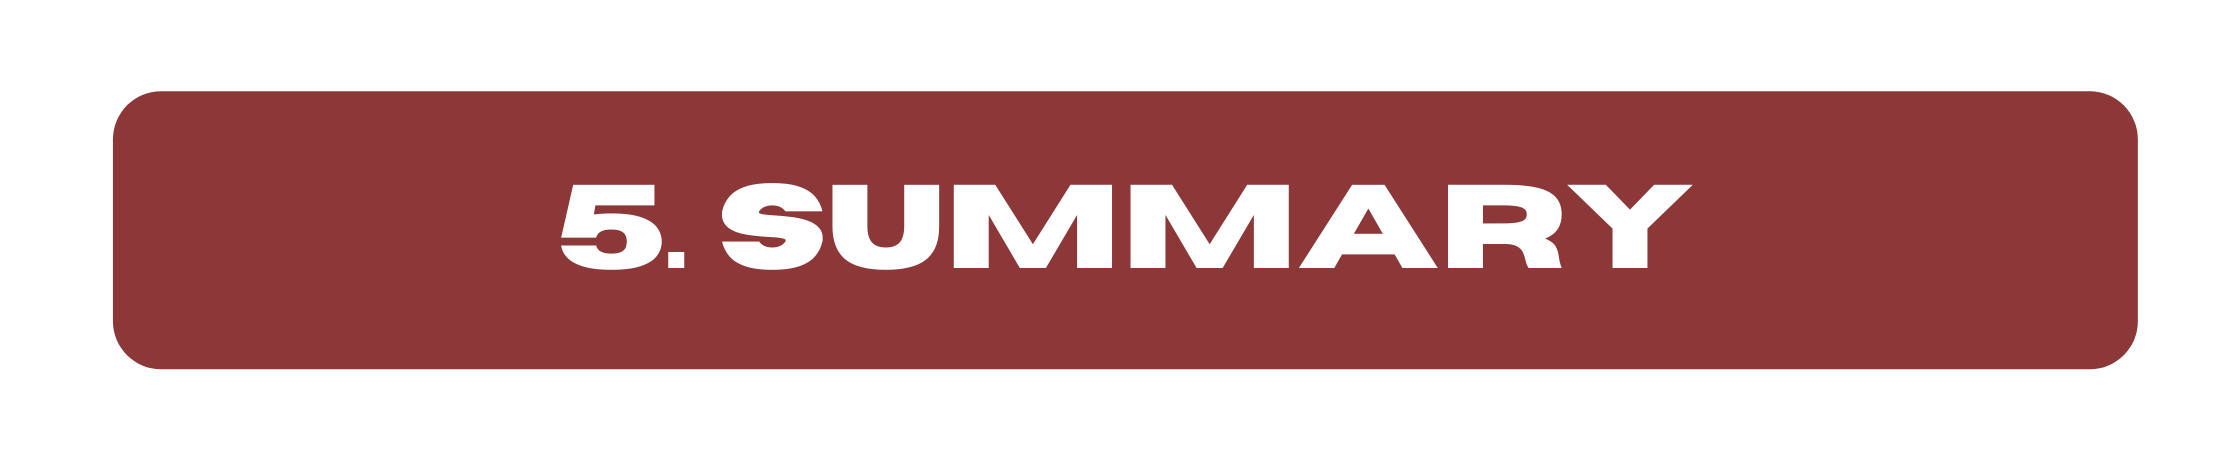
</div>

<font color='blood red'><font size="4">Based on the insights of every model we have used, Support Vector Machine is the best model to use.?????????????
    
- <font color='blood red'><font size="4"> False negative values LOWEST,  Recall score HIGHEST